# Разведочный анализ данных и построение прогнозных моделей

<a id="1"></a>
# 1) Текстовое описание набора данных

Датасет `laptop_price.csv` (<a href='https://www.kaggle.com/muhammetvarl/laptop-price'>источник</a>) содержит информацию о характеристиках ноутбуков.

Параметры:
- *laptop_ID* - уникальный идентификатор ноутбука,
- *Company* - производитель ноутбука,
- *Product* - название модели ноутубка,
- *TypeName* - тип ноутбука,
- *Inches* - размер дисплея ноутбука в дюймах,
- *ScreenResolution* - разрешение экрана ноутбука,
- *Cpu* - процессор ноутбука,
- *Ram* - оперативная память ноутбука,
- *Memory* - тип и объём жёсткого диска (или жёстких дисков) ноутбука,
- *Gpu* - графический процессор ноутбука,
- *OpSys* - операционная система, установленная на ноутбуке,
- *Weight* - масса ноутбука,
- *Price_euros* - стоимость ноутбука в евро.

<a id="2"></a>
## Подключение библиотек для анализа данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
import math
from matplotlib.lines import Line2D
import statsmodels.api as sm
from scipy import stats
from scipy import special

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', 25)

<a id="3"></a>
## Загрузка датасета из файла `laptop_price.csv`

In [2]:
data = pd.read_csv('laptop_price.csv', encoding='windows-1251')

<a id="4"></a>
<br></br>
# 2) Основные характеристики датасета

Выведем первые 5 строк датасета для проверки корректного импорта данных:

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Видим, что данные загружены корректно. Разбиения по строкам и столбцам произведены верно. Проблем с кодировкой не возникло.

Узнаем размер датасета:

In [4]:
print(f'Количество записей: {data.shape[0]}\nКоличество параметров: {data.shape[1]}')

Количество записей: 1303
Количество параметров: 13


Посмотрим краткую информацию обо всех параматрах датасета:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Видим, что в датасете присутствуют данные нескольких типов: целочисленные ( `int64` ), вещественные ( `float64` ) и строковые ( `object` ). Также узнаём, что в каждом столбце присутствует ровно `1303` значения, следовательно у нас отсутствуют пустые ячейки, что говорит об отсутствии явных пропусков данных в датасете.

<a id="6_1"></a>
## Пропущенные данные

Убедимся ещё раз в том, что в датасете отсутсвуют пропущенные данные. Для этого выведем список параметров датасета и для каждого из них найдём количество `null` значений.  

In [6]:
for column in data.columns:
    print(f'{column}: {data[column].isnull().sum()} null values')

laptop_ID: 0 null values
Company: 0 null values
Product: 0 null values
TypeName: 0 null values
Inches: 0 null values
ScreenResolution: 0 null values
Cpu: 0 null values
Ram: 0 null values
Memory: 0 null values
Gpu: 0 null values
OpSys: 0 null values
Weight: 0 null values
Price_euros: 0 null values


<a id="7"></a>
## Преобразование данных

Ещё раз посмотрим на наши данные:

In [7]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Выведем типы данных для всех столбцов:

In [8]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

<a id="7_1"></a>
### Признак `Ram`

Заметим, что признак `Ram` можно сделать целочисленным, приведя все значения к однйо единице измерения и убрав её название из самих значений. Информативность от этого не уменьшится, а оцеивать целочисленный признак будет намного удобнее, чем строковый. Посмотрим, какие единицы измерения используются в значениях признака `Ram`.

In [9]:
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

Так как все значения измеряются в GB, просто уберем две этих буквы из значений, а информацию о единице измерения перенесём в название признака:

In [10]:
data['Ram'] = data['Ram'].map(lambda x:int(x[:-2]))
data.rename(columns={'Ram': 'Ram_GB'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<a id="7_2"></a>
### Признак `Weight`

Проведём аналогичные преобразования с признаком `Weight`. Проверим, есть ли значения с другой единицей измерения помимо kg:

In [11]:
data[data['Weight'].apply(lambda x: not x.endswith('kg'))]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros


Записи с другими единицами измерения не найдены. Удаляем буквы kg из значений и информацию о единице измерения переносим в название признака:

In [12]:
data['Weight'] = data['Weight'].map(lambda x:float(x[:-2]))
data.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<a id="7_3"></a>
### Признак `ScreenResolution`

Посмотрим на формат записей в столбце `ScreenResolution`:

In [13]:
for screen_res in sorted(data['ScreenResolution'].unique()):
    print(screen_res)

1366x768
1440x900
1600x900
1920x1080
2560x1440
4K Ultra HD / Touchscreen 3840x2160
4K Ultra HD 3840x2160
Full HD / Touchscreen 1920x1080
Full HD 1920x1080
IPS Panel 1366x768
IPS Panel 2560x1440
IPS Panel 4K Ultra HD / Touchscreen 3840x2160
IPS Panel 4K Ultra HD 3840x2160
IPS Panel Full HD / Touchscreen 1920x1080
IPS Panel Full HD 1366x768
IPS Panel Full HD 1920x1080
IPS Panel Full HD 1920x1200
IPS Panel Full HD 2160x1440
IPS Panel Full HD 2560x1440
IPS Panel Quad HD+ / Touchscreen 3200x1800
IPS Panel Quad HD+ 2560x1440
IPS Panel Quad HD+ 3200x1800
IPS Panel Retina Display 2304x1440
IPS Panel Retina Display 2560x1600
IPS Panel Retina Display 2736x1824
IPS Panel Retina Display 2880x1800
IPS Panel Touchscreen / 4K Ultra HD 3840x2160
IPS Panel Touchscreen 1366x768
IPS Panel Touchscreen 1920x1200
IPS Panel Touchscreen 2400x1600
IPS Panel Touchscreen 2560x1440
Quad HD+ / Touchscreen 3200x1800
Quad HD+ 3200x1800
Touchscreen / 4K Ultra HD 3840x2160
Touchscreen / Full HD 1920x1080
Touchscreen /

Наблюдаем 2 важных факта. Во-первых, не для всех ноутбуков представлена информация о типе дисплея. Во-вторых, даже в тех случаях, когда информация представлена, она не везде полная. Это необходимо будет учитывать при выборе признаков для обучения моделей в дальнейшем.

Признак `ScreenResolution` заменим на несколько отдельных признаков: `Touchscreen`, `ScreenRes`, `ScreenWidth`, `ScreenHeight`. Первые 2 признака будут строковыми, два последних - целочисленными. Для записей, в которых отсутствует информация о в, подставим значение `-`.

In [14]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: int('Touchscreen' in x))
data['ScreenWidth'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind(' ') + 1: x.rfind('x')]))
data['ScreenHeight'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind('x') + 1:]))
data['ScreenRes'] = data['ScreenWidth'].apply(str) + 'x' + data['ScreenHeight'].apply(str)
data[['ScreenResolution', 'Touchscreen', 'ScreenWidth', 'ScreenHeight']].tail()

,ScreenResolution,Touchscreen,ScreenWidth,ScreenHeight
1298,IPS Panel Full HD / Touchscreen 1920x1080,1,1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200x1800,1,3200,1800
1300,1366x768,0,1366,768
1301,1366x768,0,1366,768
1302,1366x768,0,1366,768


Исходный столбец `ScreenResolution` теперь можно удалить без потери важной информации:

In [15]:
data.drop(['ScreenResolution'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,2560x1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,1440x900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,1920x1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,2880,1800,2880x1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,2560,1600,2560x1600


<a id="7_4"></a>
### Признак `Cpu`

Признак `Cpu` заменим на 4 отдельных признака: `Cpu_producer`, `Сpu_model`, `Cpu_series` и `Cpu_GHz`. Первые 3 признака останутся строковыми, последний будет вещественным. Убедимся перед преобразованиями, что нет значений с единицей измерения, отличной от GHz.

In [16]:
data[data['Cpu'].apply(lambda x: not x.endswith('GHz'))]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes


Посмотрим на формат данных в столбце `Cpu`:

In [17]:
sorted(data['Cpu'].unique())

['AMD A10-Series 9600P 2.4GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD A10-Series A10-9620P 2.5GHz',
 'AMD A12-Series 9700P 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD A4-Series 7210 2.2GHz',
 'AMD A6-Series 7310 2GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A6-Series 9220 2.9GHz',
 'AMD A6-Series A6-9220 2.5GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD A9-Series 9420 2.9GHz',
 'AMD A9-Series 9420 3GHz',
 'AMD A9-Series A9-9420 3GHz',
 'AMD E-Series 6110 1.5GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD E-Series 9000 2.2GHz',
 'AMD E-Series 9000e 1.5GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD E-Series E2-9000 2.2GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD FX 8800P 2.1GHz',
 'AMD FX 9830P 3GHz',
 'AMD Ryzen 1600 3.2GHz',
 'AMD Ryzen 1700 3GHz',
 'Intel Atom X5-Z8350 1.44GHz',
 'Intel Atom Z8350 1.92GHz',
 'Intel Atom x5-Z8300 1.44GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GH

In [18]:
def get_cpu_producer(cpu_full_name):
    return cpu_full_name.split()[0]

def get_cpu_model(cpu_full_name):
    model = ''
    words = cpu_full_name.split()[1:]
    if words[0] == 'Xeon':
        model = ' '.join(words[:-2])
    elif words[0] == 'Core' and len(words) == 2:
        model = ' '.join(words)
    else:
        model = ' '.join(words[:-1])
    return model

def get_cpu_series(cpu_full_name):
    series = ''
    words = cpu_full_name.split()[1:]
    if words[0] == 'Xeon':
        series = ' '.join(words[-2:])
    elif words[0] == 'Core' and len(words) == 2:
        series = '-'
    else:
        series = words[-1]
    return series

In [19]:
cpu_names = data['Cpu'].apply(lambda x: x[:x.rfind(' ')])
data['Cpu_producer'] = cpu_names.apply(get_cpu_producer)
data['Cpu_series'] = cpu_names.apply(get_cpu_series)
data['Cpu_model'] = cpu_names.apply(get_cpu_model)

data['Cpu_GHz'] = data['Cpu'].apply(lambda x: float(x[x.rfind(' ') + 1: -3]))
data[['Cpu', 'Cpu_producer', 'Cpu_model', 'Cpu_series', 'Cpu_GHz']].head(10)

,Cpu,Cpu_producer,Cpu_model,Cpu_series,Cpu_GHz
0,Intel Core i5 2.3GHz,Intel,Core i5,-,2.3
1,Intel Core i5 1.8GHz,Intel,Core i5,-,1.8
2,Intel Core i5 7200U 2.5GHz,Intel,Core i5,7200U,2.5
3,Intel Core i7 2.7GHz,Intel,Core i7,-,2.7
4,Intel Core i5 3.1GHz,Intel,Core i5,-,3.1
5,AMD A9-Series 9420 3GHz,AMD,A9-Series,9420,3.0
6,Intel Core i7 2.2GHz,Intel,Core i7,-,2.2
7,Intel Core i5 1.8GHz,Intel,Core i5,-,1.8
8,Intel Core i7 8550U 1.8GHz,Intel,Core i7,8550U,1.8
9,Intel Core i5 8250U 1.6GHz,Intel,Core i5,8250U,1.6


Проверим правильность разбиения `Cpu` на 3 столбца:

In [20]:
print(f"Cpu producers:\n\n{data['Cpu_producer'].unique()}\n\n")
print(f"Cpu models:\n\n{data['Cpu_model'].unique()}\n\n")
print(f"Cpu series:\n\n{data['Cpu_series'].unique()}")

Cpu producers:

['Intel' 'AMD' 'Samsung']


Cpu models:

['Core i5' 'Core i7' 'A9-Series' 'Core i3' 'Core M' 'Atom' 'E-Series'
 'A6-Series' 'Celeron Dual Core' 'Ryzen' 'Pentium Quad Core' 'FX' 'Xeon'
 'A10-Series' 'A8-Series' 'A12-Series' 'Celeron Quad Core'
 'Pentium Dual Core' 'A4-Series' 'Cortex']


Cpu series:

['-' '7200U' '9420' '8550U' '8250U' '6006U' 'm3' '7500U' '7100U'
 'x5-Z8350' '7300HQ' 'E2-9000e' '8650U' 'x5-Z8300' 'E2-6110' '9220'
 'N3350' '7130U' '7700HQ' '1700' 'N4200' 'x5-Z8550' 'N3060' '9830P'
 '7560U' '6110' '6200U' '6Y75' '6920HQ' '7Y54' '7820HK' 'E3-1505M V6'
 '6500U' '9000e' 'A10-9620P' 'A6-9220' '6600U' '3205U' '7820HQ' '9600P'
 '7600U' '7410' '3855U' 'N3710' '9720P' '7300U' 'N3450' '6440HQ' '6820HQ'
 '1600' '7Y75' '7440HQ' '7660U' 'm3-7Y30' '7Y57' '6700HQ' '6100U' '9620P'
 '7110' 'A9-9420' '6820HK' '7Y30' 'E3-1535M v6' 'N3160' '6300U' 'E2-9000'
 'N3050' 'M3-6Y30' '6300HQ' '7310' 'Z8350' 'E3-1535M v5' '6260U' '9700P'
 '4405U' '7210' '6560U' 'm7-6Y75' '8800P' 'M7

Исходный столбец `Cpu` теперь можно удалить без потери информации:

In [21]:
data.drop(['Cpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,2560,1600,2560x1600,Intel,-,Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,1440,900,1440x900,Intel,-,Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,1920,1080,1920x1080,Intel,7200U,Core i5,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,2880,1800,2880x1800,Intel,-,Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,2560,1600,2560x1600,Intel,-,Core i5,3.1


<a id="7_5"></a>
### Признак `Gpu`

Посмотрим на формат данных в столбце `Gpu`:

In [22]:
sorted(data['Gpu'].unique())

['AMD FirePro W4190M',
 'AMD FirePro W4190M ',
 'AMD FirePro W5130M',
 'AMD FirePro W6150M',
 'AMD R17M-M1-70',
 'AMD R4 Graphics',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'AMD Radeon 540',
 'AMD Radeon Pro 455',
 'AMD Radeon Pro 555',
 'AMD Radeon Pro 560',
 'AMD Radeon R2',
 'AMD Radeon R2 Graphics',
 'AMD Radeon R3',
 'AMD Radeon R4',
 'AMD Radeon R4 Graphics',
 'AMD Radeon R5',
 'AMD Radeon R5 430',
 'AMD Radeon R5 520',
 'AMD Radeon R5 M315',
 'AMD Radeon R5 M330',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M420X',
 'AMD Radeon R5 M430',
 'AMD Radeon R7',
 'AMD Radeon R7 Graphics',
 'AMD Radeon R7 M360',
 'AMD Radeon R7 M365X',
 'AMD Radeon R7 M440',
 'AMD Radeon R7 M445',
 'AMD Radeon R7 M460',
 'AMD Radeon R7 M465',
 'AMD Radeon R9 M385',
 'AMD Radeon RX 540',
 'AMD Radeon RX 550',
 'AMD Radeon RX 560',
 'AMD Radeon RX 580',
 'ARM Mali T860 MP4',
 'Intel Graphics 620',
 'Intel HD Graphics',
 'Intel HD Graphics 400',
 'Intel HD Graphics 405',
 'Intel HD Graphics 500',
 'Intel HD Graph

Необходимая предобработка данных:
- нашли странное значение `GeForce GTX 960<U+039C>` в признаке `Gpu_model`. `<U+039C>` является кодом буквы М. Сделаем необходимое преобразование 
- удалим пробелы в конце строк
- добавим пробелы перед числами в `GTX1050`, `GTX1060`, `GTX1080`
- удалим пробел в записи `1050 Ti`
- добавим пропущенное слово `Radeon` для `AMD R4 Graphics`
- добавим пропущенное слово `GeForce` для `Nvidia GTX 980 SLI`

In [23]:
def gpu_cleaning(gpu_full_name):
    gpu_full_name = gpu_full_name.strip()
    gpu_full_name = gpu_full_name.replace('GTX1050', 'GTX 1050')
    gpu_full_name = gpu_full_name.replace('GTX1060', 'GTX 1060')
    gpu_full_name = gpu_full_name.replace('GTX1080', 'GTX 1080')
    gpu_full_name = gpu_full_name.replace('1050 Ti', '1050Ti')
    gpu_full_name = gpu_full_name.replace('AMD R4', 'AMD Radeon R4')
    gpu_full_name = gpu_full_name.replace('Nvidia GTX', 'Nvidia GeForce GTX')
    gpu_full_name = gpu_full_name.replace('<U+039C>', 'M')
    return gpu_full_name

In [24]:
data['Gpu'] = data['Gpu'].apply(lambda x: gpu_cleaning(x))

Признак `Gpu` заменим на 2 отдельных признака: `Gpu_producer` и `Gpu_model`. Оба признака будут строковыми. Отдельное выделение категориального признака `Gpu_producer` может оказаться полезным при дальнейшем анализе данных.

In [25]:
def get_gpu_producer(gpu_full_name):
    return gpu_full_name.split()[0]

def get_gpu_model(gpu_full_name):
    model = ''
    words = gpu_full_name.split()[1:]
    if words[0] == 'R17M-M1-70':
        model = '-'
    elif words[0] == 'Mali':
        model = words[0]
    elif words[-1] in ['R2', 'R3', 'R4', 'R5', 'R7', 'Graphics']:
        model = ' '.join(words)
    else:
        model = ' '.join(words[:-1])
    return model

def get_gpu_series(gpu_full_name):
    series = ''
    words = gpu_full_name.split()[1:]
    if words[0] == 'R17M-M1-70':
        series = words[0]
    elif words[0] == 'Mali':
        series = ' '.join(words[1:])
    elif words[-1] in ['R2', 'R3', 'R4', 'R5', 'R7', 'Graphics']:
        series = '-'
    else:
        series = words[-1]
    return series

In [26]:
data['Gpu_producer'] = data['Gpu'].apply(get_gpu_producer)
data['Gpu_model'] = data['Gpu'].apply(get_gpu_model)
data['Gpu_series'] = data['Gpu'].apply(get_gpu_series)
data[['Gpu', 'Gpu_producer', 'Gpu_model', 'Gpu_series']].head(10)

,Gpu,Gpu_producer,Gpu_model,Gpu_series
0,Intel Iris Plus Graphics 640,Intel,Iris Plus Graphics,640
1,Intel HD Graphics 6000,Intel,HD Graphics,6000
2,Intel HD Graphics 620,Intel,HD Graphics,620
3,AMD Radeon Pro 455,AMD,Radeon Pro,455
4,Intel Iris Plus Graphics 650,Intel,Iris Plus Graphics,650
5,AMD Radeon R5,AMD,Radeon R5,-
6,Intel Iris Pro Graphics,Intel,Iris Pro Graphics,-
7,Intel HD Graphics 6000,Intel,HD Graphics,6000
8,Nvidia GeForce MX150,Nvidia,GeForce,MX150
9,Intel UHD Graphics 620,Intel,UHD Graphics,620


Проверим правильность разбиения `Gpu` на 3 столбца:

In [27]:
print(f"Gpu producers:\n\n{data['Gpu_producer'].unique()}\n\n")
print(f"Gpu models:\n\n{data['Gpu_model'].unique()}\n\n")
print(f"Gpu series:\n\n{data['Gpu_series'].unique()}")

Gpu producers:

['Intel' 'AMD' 'Nvidia' 'ARM']


Gpu models:

['Iris Plus Graphics' 'HD Graphics' 'Radeon Pro' 'Radeon R5'
 'Iris Pro Graphics' 'GeForce' 'UHD Graphics' 'GeForce GTX' 'Radeon R2'
 'Radeon' 'Iris Graphics' 'Radeon RX' 'Radeon R4 Graphics' 'Radeon R7'
 'GeForce GTX 980' '-' 'Quadro' 'FirePro' 'GeForce GT' 'Radeon R4'
 'Radeon R2 Graphics' 'Graphics' 'Radeon R7 Graphics' 'Radeon R3'
 'Radeon R9' 'Mali']


Gpu series:

['640' '6000' '620' '455' '650' '-' 'MX150' '520' '555' 'M430' '615' '560'
 '940MX' '400' '1050' '530' '930MX' '500' '1060' '150MX' '540' '580'
 '920MX' '1070' '1050Ti' 'MX130' '920M' 'M445' '550' '1050M' '515' 'M420'
 '505' 'SLI' 'R17M-M1-70' '1080' 'M1200' '950M' 'W4190M' '980M' '930M'
 '630' '430' '940M' '510' '405' 'W5130M' 'M2200M' 'M620' 'M460' '965M'
 '960M' 'M620M' '970M' '960' 'M440' 'M520M' 'M2200' 'M2000M' 'M1000M'
 '1070M' '5300' 'M420X' '920' 'M465' 'M365X' 'M385' '3000M' '980' 'M330'
 'W6150M' 'M315' 'M500M' 'M360' 'M3000M' 'T860 MP4']


Исходный столбец `Gpu` теперь можно удалить без потери информации:

In [28]:
data.drop(['Gpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37,1339.69,0,2560,1600,2560x1600,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,898.94,0,1440,900,1440x900,Intel,-,Core i5,1.8,Intel,HD Graphics,6000
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86,575.00,0,1920,1080,1920x1080,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83,2537.45,0,2880,1800,2880x1800,Intel,-,Core i7,2.7,AMD,Radeon Pro,455
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37,1803.60,0,2560,1600,2560x1600,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650


<a id="7_6"></a>
### Признак `Memory`

Признак `Memory` заменим на 5 отдельных признака: `Memory1_GB`, `Memory1_type`, `Memory2_GB`, `Memory2_type`, `Memory2`. Признаки `Memory1_GB` и `Memory2_GB` будут целочисленными, признаки `Memory1_type`, `Memory2_type`, `Memory2` - строковыми. Признак `Memory2` вводим для удобства дальнейшего анализа, он будет содержать в себе и тип, и объём второго жёсткого диска. Если у ноутбука нет второго жёсткого диска, то `Memory2_GB` присвоим 0, а в `Memory2_type` и `Memory2` запишем '-'. При разбиении необходимо учесть, что не все значения объёма памяти имеют единицу измерения GB. Если значение записано в TB, перед удалением единицы измерения значение нужно перевести в GB.

In [29]:
sorted(data['Memory'].unique())

['1.0TB HDD',
 '1.0TB Hybrid',
 '128GB Flash Storage',
 '128GB HDD',
 '128GB SSD',
 '128GB SSD +  1TB HDD',
 '128GB SSD +  2TB HDD',
 '16GB Flash Storage',
 '16GB SSD',
 '180GB SSD',
 '1TB HDD',
 '1TB HDD +  1TB HDD',
 '1TB SSD',
 '1TB SSD +  1TB HDD',
 '240GB SSD',
 '256GB Flash Storage',
 '256GB SSD',
 '256GB SSD +  1.0TB Hybrid',
 '256GB SSD +  1TB HDD',
 '256GB SSD +  256GB SSD',
 '256GB SSD +  2TB HDD',
 '256GB SSD +  500GB HDD',
 '2TB HDD',
 '32GB Flash Storage',
 '32GB HDD',
 '32GB SSD',
 '500GB HDD',
 '508GB Hybrid',
 '512GB Flash Storage',
 '512GB SSD',
 '512GB SSD +  1.0TB Hybrid',
 '512GB SSD +  1TB HDD',
 '512GB SSD +  256GB SSD',
 '512GB SSD +  2TB HDD',
 '512GB SSD +  512GB SSD',
 '64GB Flash Storage',
 '64GB Flash Storage +  1TB HDD',
 '64GB SSD',
 '8GB SSD']

In [30]:
def get_memory1_GBz(memory):
    space_index = memory.find(' ')
    size1 = int(float(memory[:space_index - 2]))
    if memory[space_index - 2:space_index] == 'TB':
        size1 *= 1024
    return size1

def get_memory1_type(memory):
    space_index = memory.find(' ')
    plus_index = memory.find('+')
    type1 = memory[space_index+1:plus_index-1] if plus_index != -1 else memory[space_index+1:]
    return type1

def get_memory2_GBz(memory):
    plus_index = memory.find('+')
    size2 = 0
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        size2 = int(float(memory[plus_index + 3:space_index - 2]))
        if memory[space_index - 2:space_index] == 'TB':
            size2 *= 1024
    return size2

def get_memory2_type(memory):
    plus_index = memory.find('+')
    type2 = '-'
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        type2 = memory[space_index + 1:]
    return type2

In [31]:
data['Memory1_GB'] = data['Memory'].apply(get_memory1_GBz)
data['Memory1_type'] = data['Memory'].apply(get_memory1_type)
data['Memory2_GB'] = data['Memory'].apply(get_memory2_GBz)
data['Memory2_type'] = data['Memory'].apply(get_memory2_type)
data['Memory2'] = data['Memory2_type'] + (data['Memory2_type'] != '-') * (' ' + data['Memory2_GB'].apply(str) + 'GB')
data[['Memory', 'Memory1_type', 'Memory1_GB', 'Memory2_type', 'Memory2_GB']].iloc[20:30]

,Memory,Memory1_type,Memory1_GB,Memory2_type,Memory2_GB
20,32GB Flash Storage,Flash Storage,32,-,0
21,128GB SSD + 1TB HDD,SSD,128,HDD,1024
22,500GB HDD,HDD,500,-,0
23,256GB SSD,SSD,256,-,0
24,256GB SSD,SSD,256,-,0
25,1TB HDD,HDD,1024,-,0
26,128GB Flash Storage,Flash Storage,128,-,0
27,256GB SSD,SSD,256,-,0
28,256GB SSD + 256GB SSD,SSD,256,SSD,256
29,1TB HDD,HDD,1024,-,0


Исходный столбец `Memory` теперь можно удалить без потери информации:

In [32]:
data.drop(['Memory'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2560,1600,2560x1600,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,1440,900,1440x900,Intel,-,Core i5,1.8,Intel,HD Graphics,6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,0,1920,1080,1920x1080,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2880,1800,2880x1800,Intel,-,Core i7,2.7,AMD,Radeon Pro,455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,0,2560,1600,2560x1600,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650,256,SSD,0,-,-


<a id="6_2"></a>
## Дубликаты

Проверим данные на наличие дубликатов. Для начала посмотрим, все ли значения параметра `laptop_ID` уникальны.

In [33]:
print(f"Уникальных значений параметра 'laptop_ID': {data['laptop_ID'].unique().size}.")
print(f"Количество записей в датасете: {data.shape[0]}.")

Уникальных значений параметра 'laptop_ID': 1303.
Количество записей в датасете: 1303.


Видим, что количество уникальных значений параметра совпадает с количеством записей в датасете. Следовательно дубликатов в данном столбце нет.

Другие параметры могут содержать неуникальные значения и это не будет являться признаком наличия дубликатов, так как характеристики и цены ноутбуков могут совпадать у разных моделей. Поэтому проверим на уникальность целиковые записи, то есть абсолютное совпадение всех параметров за исключеним `laptop_ID`, который уже был проверен ранее. Для этого переведём все строковые данные в нижний регистр и затем воспользуемся методом `pd.duplicated`.

In [34]:
str_columns = data.dtypes[data.dtypes == object].index
data_lower = data.copy()
for str_column in str_columns:
    data_lower[str_column] = data[str_column].apply(lambda x:x.lower())
data_lower.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,apple,macbook pro,ultrabook,13.3,8,macos,1.37,1339.69,0,2560,1600,2560x1600,intel,-,core i5,2.3,intel,iris plus graphics,640,128,ssd,0,-,-
1,2,apple,macbook air,ultrabook,13.3,8,macos,1.34,898.94,0,1440,900,1440x900,intel,-,core i5,1.8,intel,hd graphics,6000,128,flash storage,0,-,-
2,3,hp,250 g6,notebook,15.6,8,no os,1.86,575.00,0,1920,1080,1920x1080,intel,7200u,core i5,2.5,intel,hd graphics,620,256,ssd,0,-,-
3,4,apple,macbook pro,ultrabook,15.4,16,macos,1.83,2537.45,0,2880,1800,2880x1800,intel,-,core i7,2.7,amd,radeon pro,455,512,ssd,0,-,-
4,5,apple,macbook pro,ultrabook,13.3,8,macos,1.37,1803.60,0,2560,1600,2560x1600,intel,-,core i5,3.1,intel,iris plus graphics,650,256,ssd,0,-,-


In [35]:
duplicate_flags = data_lower.duplicated(subset=data_lower.columns.drop("laptop_ID"))
print('Количество найденных дубликатов:', duplicate_flags.sum())

Количество найденных дубликатов: 28


Убедимся, что эти данные на самом деле являются дубликатами. Для этого выведем несколько примеров повторяющихся записей.

In [36]:
data[(data_lower.duplicated(subset=data.columns.drop("laptop_ID"), keep=False))].sort_values('Price_euros').head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
1282,1300,HP,Stream 11-Y000na,Netbook,11.6,2,Windows 10,1.17,209.0,0,1366,768,1366x768,Intel,N3060,Celeron Dual Core,1.6,Intel,HD Graphics,400,32,Flash Storage,0,-,-
1268,1286,HP,Stream 11-Y000na,Netbook,11.6,2,Windows 10,1.17,209.0,0,1366,768,1366x768,Intel,N3060,Celeron Dual Core,1.6,Intel,HD Graphics,400,32,Flash Storage,0,-,-
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,2,Windows 10,1.17,209.0,0,1366,768,1366x768,Intel,N3060,Celeron Dual Core,1.6,Intel,HD Graphics,400,32,Flash Storage,0,-,-
1286,1304,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,0,1366,768,1366x768,Intel,N3050,Celeron Dual Core,1.6,Intel,HD Graphics,-,64,Flash Storage,0,-,-
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,0,1366,768,1366x768,Intel,N3050,Celeron Dual Core,1.6,Intel,HD Graphics,-,64,Flash Storage,0,-,-


Удалим дубликаты из датасета:

In [37]:
print(f'Исходное количество записей: {data.shape[0]}')
data.drop(data[duplicate_flags].index, inplace=True)
data_lower.drop(data_lower[duplicate_flags].index, inplace=True)
print(f'Оставшееся количество записей: {data.shape[0]}')

Исходное количество записей: 1303
Оставшееся количество записей: 1275


28 дубликатов были успешно удалены. Теперь остаётся лишь проверить наличие в датасете нескольких записей об одних и тех же ноутбуках, но с разными ценами, то есть провести поиск дубликатов по всем параметрам кроме `laptop_ID` и `Price_euros`.

In [38]:
target_columns = data.columns.drop(['laptop_ID', 'Price_euros'])
duplicate_flags = data_lower.duplicated(subset=target_columns, keep=False)
first_keep_duplicate_flags = data_lower.duplicated(subset=target_columns, keep='first')
print('Общее количество найденных дубликатов:', duplicate_flags.sum())
print('Количество дубликатов за вычетом первого вхождения:', first_keep_duplicate_flags.sum())

Общее количество найденных дубликатов: 60
Количество дубликатов за вычетом первого вхождения: 30


Имеем 30 записей, каждая из которых встречается ровно 2 раза. Просто удалить эти 30 записей мы не можем, так как потеряем часть важной информации о вариации цен на модель ноутбука. Поэтому перед тем, как убрать эти записи из датасета, посчитаем и сохраним вместо нескольких цен среднюю стоимость для каждого из ноутбуков, информация о которых представлена несколько раз.

In [39]:
duplicated_data = data[(data_lower.duplicated(subset=target_columns, keep=False))]
sorted_duplicated_data = duplicated_data.sort_values(list(target_columns.values))
sorted_duplicated_data.head(4)

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
210,215,Acer,Aspire 7,Notebook,15.6,8,Linux,2.4,779.00,0,1920,1080,1920x1080,Intel,7700HQ,Core i7,2.8,Nvidia,GeForce GTX,1050,1024,HDD,0,-,-
379,385,Acer,Aspire 7,Notebook,15.6,8,Linux,2.4,846.00,0,1920,1080,1920x1080,Intel,7700HQ,Core i7,2.8,Nvidia,GeForce GTX,1050,1024,HDD,0,-,-
71,73,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows 10,1.4,955.00,0,1920,1080,1920x1080,Intel,8550U,Core i7,1.8,AMD,Radeon,530,256,SSD,0,-,-
215,220,Dell,Inspiron 5370,Ultrabook,13.3,8,Windows 10,1.4,931.88,0,1920,1080,1920x1080,Intel,8550U,Core i7,1.8,AMD,Radeon,530,256,SSD,0,-,-


In [40]:
for i in range(0, sorted_duplicated_data.shape[0], 2):
    mean_price = round(sorted_duplicated_data.iloc[i:i+2]['Price_euros'].mean(), 2)
    data.loc[data['laptop_ID'] == sorted_duplicated_data.iloc[i]['laptop_ID'], 'Price_euros'] = mean_price
    data.drop(data[data['laptop_ID'] == sorted_duplicated_data.iloc[i + 1]['laptop_ID']].index, inplace=True)

In [41]:
duplicate_flags = data.duplicated(subset=target_columns)
print('Количество найденных дубликатов:', duplicate_flags.sum())
print(f'Оставшееся количество записей: {data.shape[0]}')

Количество найденных дубликатов: 0
Оставшееся количество записей: 1245


<a id="6_3"></a>
## Неинформативные значения

Теперь проведём поиск неинформативных параметров, которые не пригодятся в дальнейшем при анализе. Неинформативными будем считать такие параметры, значения которых являются уникальными либо, наоборот, принимают одно и то же значение. Для поиска таких параметров посчитаем количество уникальных значений в каждом столбце. Тогда неинформативными будут параметры, количество уникальных значений которого равно 1 либо очень близко к количеству записей всего датасета.

*Примечание: параметр `laptop_ID` служит для идентификации записей, поэтому хоть все его значения и являются уникальным, мы его не удаляем.*

In [42]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n')

Всего записей: 1245
--------------------
laptop_ID: 1245 уникальных значений
Company: 19 уникальных значений
Product: 618 уникальных значений
TypeName: 6 уникальных значений
Inches: 18 уникальных значений
Ram_GB: 9 уникальных значений
OpSys: 9 уникальных значений
Weight_kg: 171 уникальных значений
Price_euros: 788 уникальных значений
Touchscreen: 2 уникальных значений
ScreenWidth: 13 уникальных значений
ScreenHeight: 10 уникальных значений
ScreenRes: 15 уникальных значений
Cpu_producer: 3 уникальных значений
Cpu_series: 88 уникальных значений
Cpu_model: 20 уникальных значений
Cpu_GHz: 25 уникальных значений
Gpu_producer: 4 уникальных значений
Gpu_model: 26 уникальных значений
Gpu_series: 76 уникальных значений
Memory1_GB: 13 уникальных значений
Memory1_type: 4 уникальных значений
Memory2_GB: 6 уникальных значений
Memory2_type: 4 уникальных значений
Memory2: 7 уникальных значений


Видим, что пока что ни про один из параметров нельзя сказать, что он является неинформативным. Однако стоит отметить, что параметр `Product` всё же имеет довольно много уникальных значений. Поэтому с учётом небольшого размера можно предположить, что данный признак будет малоинформативным.

<a id="9"></a>
## Агрегирование данных

Посмотрим на итоговый вид набора данных после всех сделанных преобразований.

In [43]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2560,1600,2560x1600,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,1440,900,1440x900,Intel,-,Core i5,1.8,Intel,HD Graphics,6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,0,1920,1080,1920x1080,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2880,1800,2880x1800,Intel,-,Core i7,2.7,AMD,Radeon Pro,455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,0,2560,1600,2560x1600,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650,256,SSD,0,-,-


Воспользуемся методом `describe` для получения основных численных характеристик по каждому из признаков. Выведем показатели отдельно для числовых и отдельно для строковых признаков.

In [44]:
data.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,646.228916,15.031727,8.448193,2.045269,1132.847751,0.144578,1897.625703,1072.475502,2.304514,447.238554,174.554217
std,374.178663,1.415735,5.130602,0.669917,704.394031,0.351816,492.610114,283.608997,0.502882,367.851044,411.342955
min,1.000000,10.100000,2.000000,0.690000,174.000000,0.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,321.000000,14.000000,4.000000,1.500000,599.000000,0.000000,1600.000000,900.000000,2.000000,256.000000,0.000000
50%,645.000000,15.600000,8.000000,2.040000,988.000000,0.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,972.000000,15.600000,8.000000,2.310000,1492.800000,0.000000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,1292.000000,18.400000,64.000000,4.700000,6099.000000,1.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [45]:
data.describe(include=['object']).T

,count,unique,top,freq
Company,1245,19,Dell,281
Product,1245,618,XPS 13,29
TypeName,1245,6,Notebook,689
OpSys,1245,9,Windows 10,1022
ScreenRes,1245,15,1920x1080,810
Cpu_producer,1245,3,Intel,1185
Cpu_series,1245,88,7200U,190
Cpu_model,1245,20,Core i7,498
Gpu_producer,1245,4,Intel,688
Gpu_model,1245,26,HD Graphics,608


Полученные характеристики убеждают нас в отсутствии явных выбросов и ошибок в данных (так как нет, например, отрицательных значений объёма памяти или массы ноутубка более тонны). 

Несколько интересных выводов, которые уже можно сделать на основании агрегированных данных:
- основная часть ноутбуков имеет оперативную память от 4 до 8 ГБ, значения выше встречаются нечасто;
- частота процессора в большинстве ноутбуков не ниже 2 ГГц;
- диапазон существующих объёмов памяти жёстких дисков довольно большой (от 8 ГБ до 2 ТБ);
- в подавляющем большинстве ноутбуков присутствует только 1 жёсткий диск и чаще всего это SSD;
- ноутбуки в целом относительно тяжёлые - средняя масса сосавляет 2 кг;
- самая популярная операционная система, установленная на ноутбуке - Windows 10;
- медианная стоимость ноутбука составляет около 1000 евро, самый дорогой ноутбук примерно в 6 раз дороже;
- сенсорный экран имеется менее, чем у 15% ноутбуков;
- Intel является наиболее популярным производителем CPU и GPU.

<a id="10"></a>
# 3) Визуальное исследование датасета

<a id="10_1"></a>
## Разбиение данных

Разделим все параметры датасета на 2 группы: признаки $Х$ и целевую переменную $y$.

In [46]:
target_name = 'Price_euros'
feature_names = data.columns.drop('Price_euros')
X = data[feature_names]
y = data[target_name]

In [47]:
X.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Touchscreen,ScreenWidth,ScreenHeight,ScreenRes,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,0,2560,1600,2560x1600,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,0,1440,900,1440x900,Intel,-,Core i5,1.8,Intel,HD Graphics,6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,0,1920,1080,1920x1080,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,0,2880,1800,2880x1800,Intel,-,Core i7,2.7,AMD,Radeon Pro,455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,0,2560,1600,2560x1600,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650,256,SSD,0,-,-


In [48]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

<a id="11"></a>
## Распределение целевой переменной $y$ 

Для анализа зависимостей в данных необходимо сначала получить общее представление о том, с какими данными мы работаем. Для целевой переменной $y$ построим гистограмму распределения с ядерной оценкой плотности и диаграмму размаха. Для вычисления внешних границ диаграммы размаха установим коэффициент `3*IQR`, чтобы обнаружить значительные выбросы.

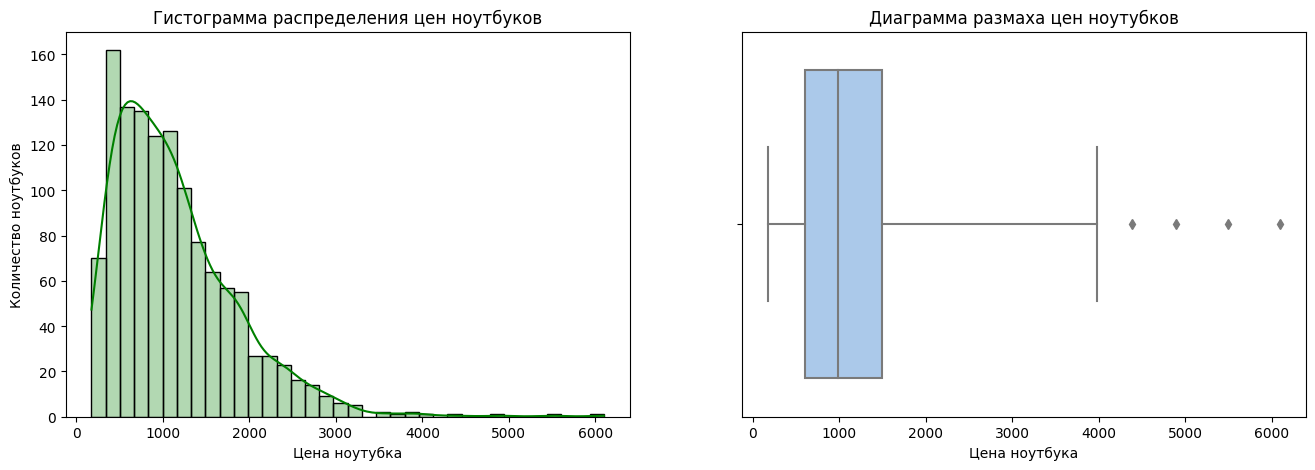

In [49]:
fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)
sns.histplot(y, kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения цен ноутбуков")
axes[0].set_xlabel('Цена ноутубка')
axes[0].set_ylabel('Количество ноутбуков')
axes[1].title.set_text('Диаграмма размаха цен ноутубков')
sns.boxplot(x=y, ax=axes[1], whis=3, palette='pastel');
axes[1].set_xlabel('Цена ноутбука')
plt.show();

Наблюдаем нессиметричное распределение с тяжёлым правым хвостом, то есть явным смещением цен в сторону низких значений. Большая часть ноутбуков расположена в низком и среднем ценовых сегментах, медианное значение около 1000 евро. Наличие ноутбуков с ценами выше 4000 евро - единичные случаи. Однако нет оснований считать экстремальные значения ошибками, поэтому удалять найденные выбросы не будем. 

Проведём тест Шапиро-Уилка на нормальность распределения для исходных цен, логарифмических и цен после приенения преобразования Бокса-Кокса с оптимальным параметром lambda.

In [50]:
def dist_analysis(x):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3))
    sns.histplot(x, kde=True, ax=ax1)
    sm.qqplot(x, ax=ax2)
    ax1.set_title('Data distribution')
    ax2.set_title('Q-Q plot')
    plt.subplots_adjust(wspace=0.4)
    plt.show()

    test_res = stats.shapiro(x)
    print('The Shapiro-Wilk test\n')
    print(f'statistic: {test_res.statistic}')
    print(f'p-value: {test_res.pvalue}')

Analysis of origin prices


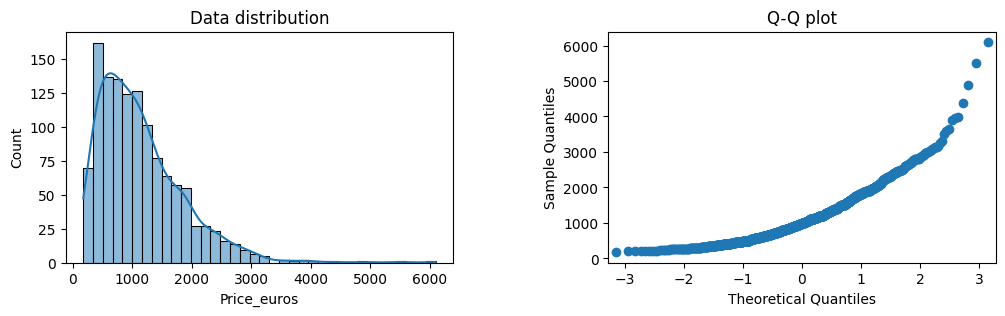

The Shapiro-Wilk test

statistic: 0.8933440446853638
p-value: 1.64615467544972e-28
_________________________________________

Analysis of log prices


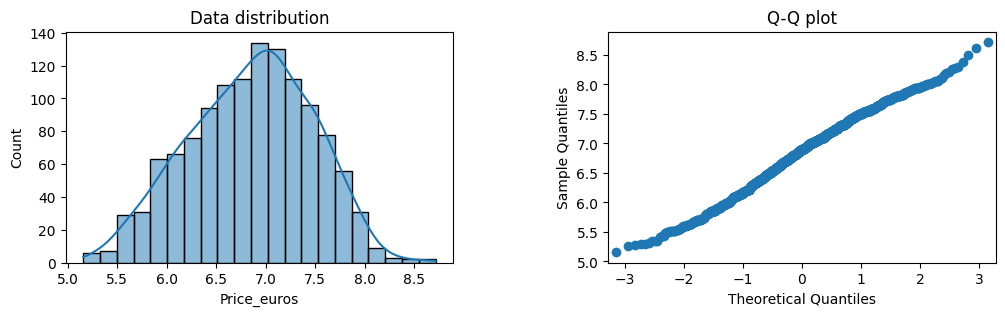

The Shapiro-Wilk test

statistic: 0.9925663471221924
p-value: 6.533682153531117e-06
_________________________________________

Analysis of prices transformed by boxcox with alpha=0.11058810105244836


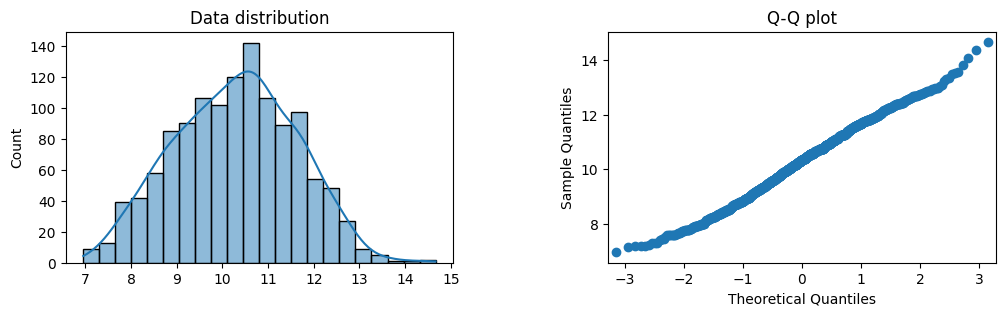

The Shapiro-Wilk test

statistic: 0.9945947527885437
p-value: 0.00018340015958528966


In [51]:
print('Analysis of origin prices')
dist_analysis(data['Price_euros'])
print('_________________________________________')
print('\nAnalysis of log prices')
log_price = np.log(data['Price_euros'])
dist_analysis(log_price)
print('_________________________________________')
boxcox_price, maxlog_lmbda = stats.boxcox(data['Price_euros'])
print(f'\nAnalysis of prices transformed by boxcox with alpha={maxlog_lmbda}')
dist_analysis(boxcox_price)

<a id="12"></a>
## Распределения признаков $X$ и их связь с ценой $y$ 

В первую очередь посмотрим на распределения каждого из признаков в отдельности с помощью гистограмм и диаграмм размаха (для числовых признаков). Также визуализируем с помощью столбчатых и точечных диаграмм зависимость целевой переменной $y$ от каждого из признаков $X$.

<u>Цель построения гистограмм и диаграмм размаха</u> - получить представление о том, как распределены значения в каждом признаке, найти особенности этих распределений, а также обнаружить экстремальные значения, выбивающиеся из общей тенденции - выбросы. Если признак имеет слишком много уникальных значений, будем показывать только самые популярные варианты. 

<u>Цель построения диаграмм</u> - наглядное изображение распределения стоимостей ноутбуков в зависимости от того или иного значения признака с целью оценки важности и степени влияния признаков на целевую переменную.

In [52]:
def show_marks(ax, percent=False, vert=False):
    if vert:
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
    else:
        ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
        
    for i, bar in enumerate(ax.patches):
        if vert:
            h = bar.get_height()
            ax.text(i, h + ax.get_ylim()[1] * 0.04, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + '%' * percent, 
                    ha='center', va='center')
        else:
            h = bar.get_width()
            ax.text(h + ax.get_xlim()[1] * 0.055, i, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + '%' * percent, 
                    ha='center', va='center')

def my_countplot(feature_col, figsize, title, x_label, y_label, vert=False, sort=False):
    plt.figure(figsize=figsize)
    order = (feature_col.value_counts().index if sort else None)
    plot = sns.countplot(x=feature_col if vert else None, y=None if vert else feature_col, order=order, palette='magma_r')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    show_marks(plot.axes, True, vert)
    plt.show()
    
def my_barplot(data, feature_name, figsize, title, x_label, hue_feature_name=None, legend_title=None, legend_loc=0, vert=True):
    plt.figure(figsize=figsize)
    if hue_feature_name:
        if vert:
            my_plot = sns.barplot(x=data[feature_name], y=y, saturation=1, hue=data[hue_feature_name])
        else:
            my_plot = sns.barplot(y=data[feature_name], x=y, saturation=1, hue=data[hue_feature_name])
        my_plot.legend(title=legend_title, loc=legend_loc)
    else:
        order = data.groupby(feature_name)['Price_euros'].mean().sort_values(ascending=False).index
        if vert:
            sns.barplot(x=data[feature_name], y=y, order=order, palette='RdYlGn', saturation=1)
        else:
            sns.barplot(y=data[feature_name], x=y, order=order, palette='RdYlGn', saturation=1)
    plt.title(f'Зависимость цен ноутбуков от {title} (доверительная вероятность = 0.95)')
    plt.ylabel('Средняя цена ноутбука');
    plt.xlabel(x_label)
    plt.show()

<a id="12_1"></a>
### Масса 

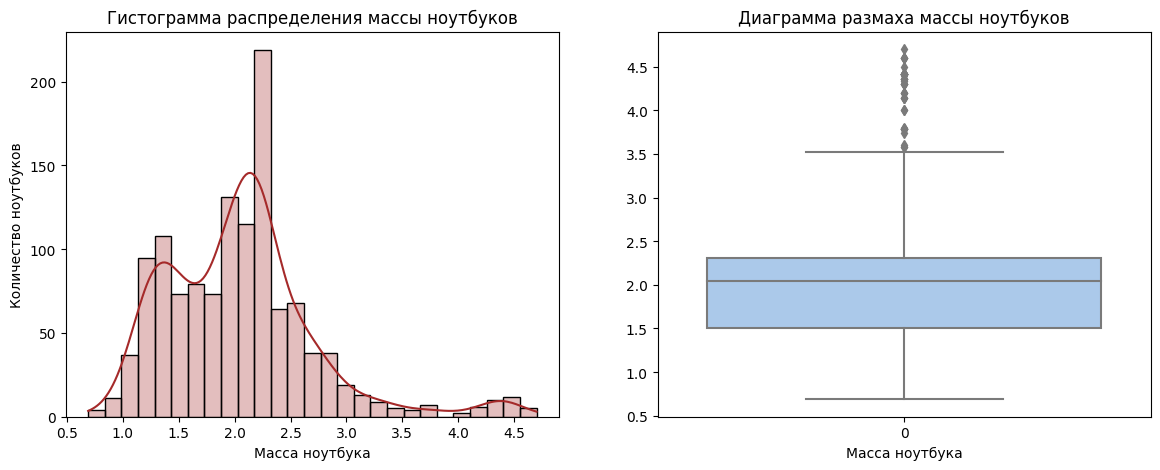

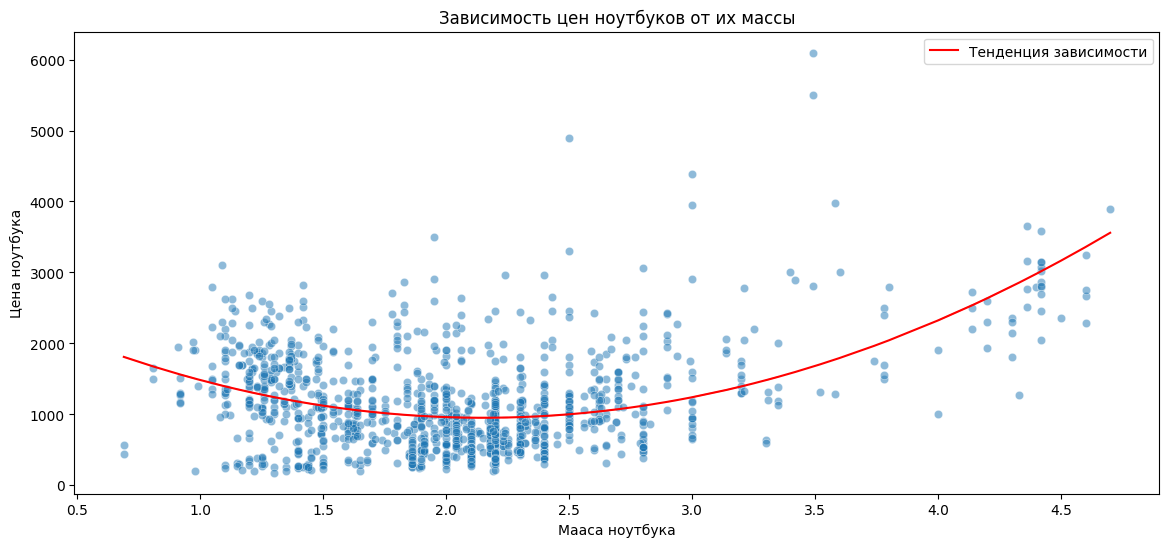

In [53]:
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2)
sns.histplot(X['Weight_kg'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения массы ноутбуков")
axes[0].set_xlabel('Масса ноутбука')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(X['Weight_kg'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха массы ноутбуков")
axes[1].set_xlabel('Масса ноутбука')
plt.show();

poly_x = PolynomialFeatures(2).fit_transform(pd.DataFrame(X['Weight_kg']))
y_pred = LinearRegression().fit(poly_x, y.array.to_numpy()).predict(poly_x)
plt.figure(figsize=(14, 6))
sns.scatterplot(x=X['Weight_kg'], y=y, alpha=0.5)
sns.lineplot(x=X['Weight_kg'], y=y_pred, color='red', label='Тенденция зависимости')
plt.title('Зависимость цен ноутбуков от их массы')
plt.xlabel('Мааса ноутбука')
plt.ylabel('Цена ноутбука')
plt.legend();

Более половины ноутбуков имеют массу от 1.5 до 2.5 кг, однако данные распределены неравномерно. Видим также значительное количество экстремальных значений (масса > 3.5 кг). Наблюдаем нелинейную зависимость в данных: самые дешёвые ноутбуки имеют массу около средней, а очень тяжёлые ноутбуки, как и очень лёгкие ноутбуки имеют в среднем более высоку стоимость.

<a id="12_2"></a>
### Модели

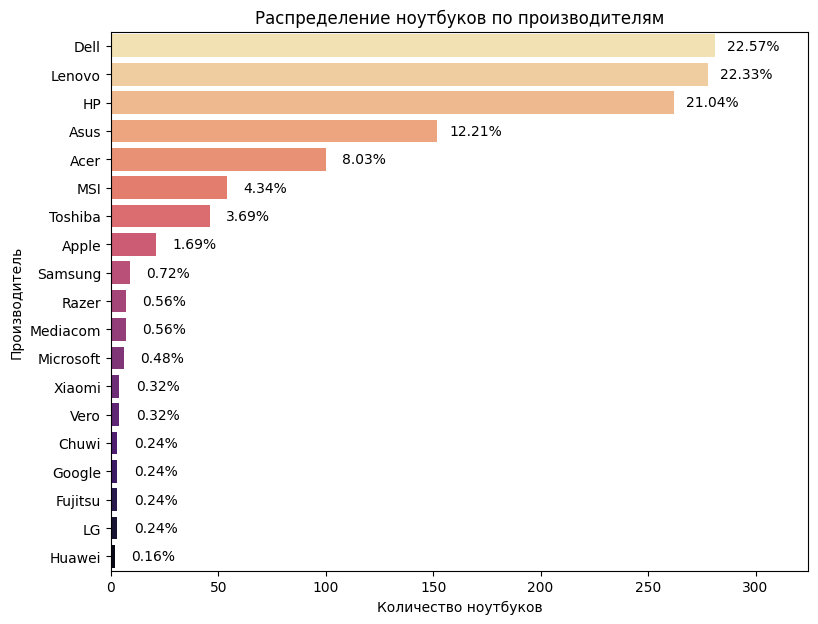

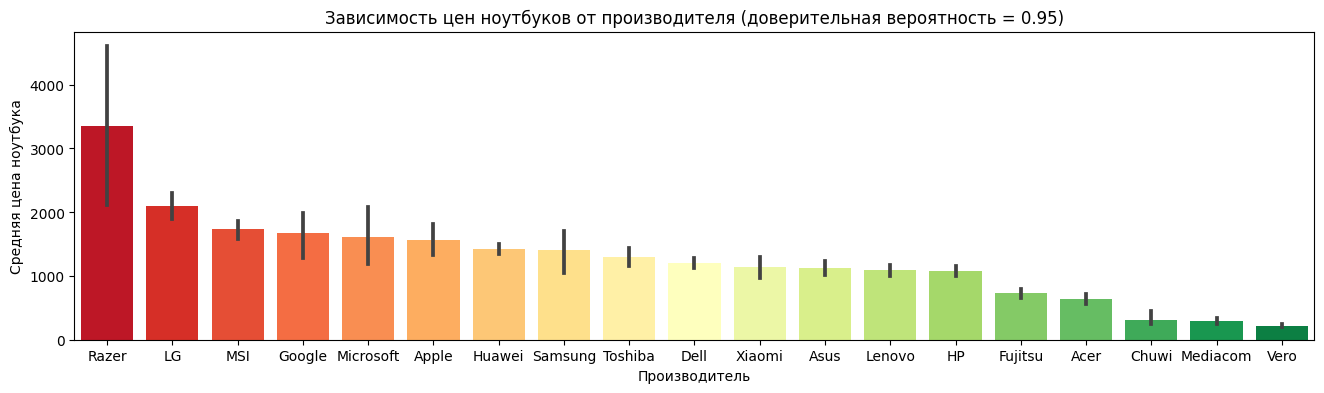

In [54]:
my_countplot(X['Company'], (9, 7), 'Распределение ноутбуков по производителям', 
                                   'Количество ноутбуков', 'Производитель', vert=False, sort=True)
my_barplot(data, 'Company', (16, 4), 'производителя', 'Производитель')

Среди производителей ноутбуков есть явные лидеры. Больше всего ноутбуков предлагают следующие фирмы:
- Dell
- Lenovo
- HP
- Asus

Посмотрим подробнее, какие модели перечисленных выше производителей встречаются чаще всего.

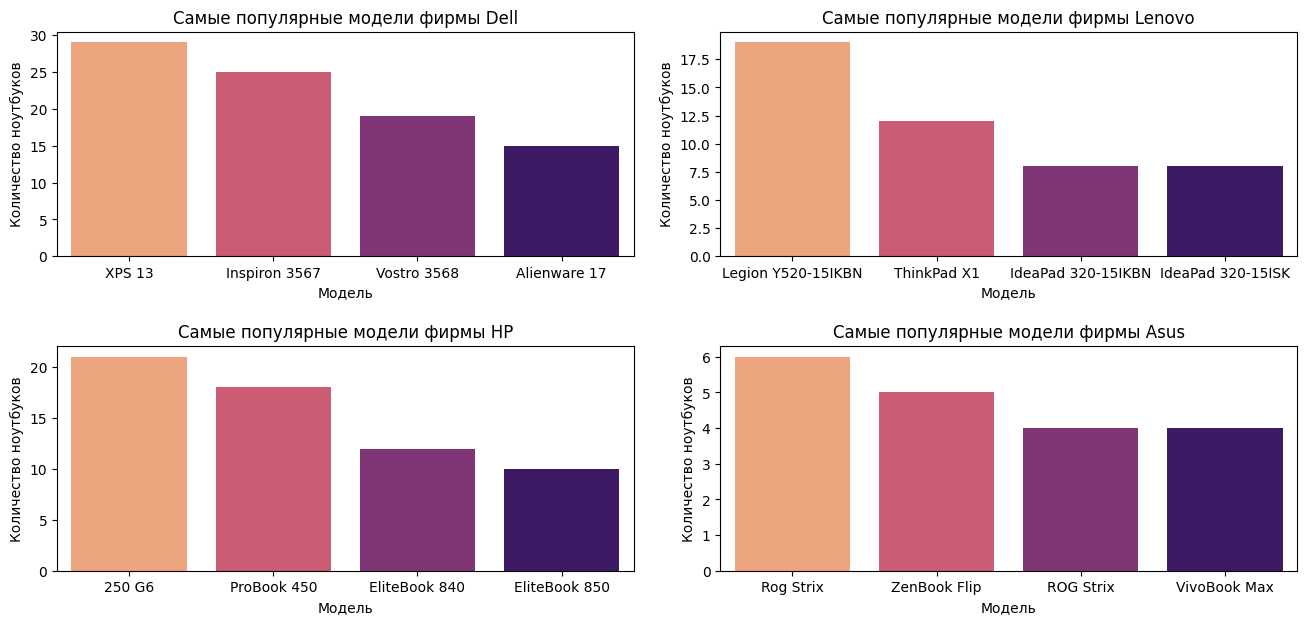

In [55]:
top_companies = X['Company'].value_counts().head(4).index.values
grouped_X = X.groupby('Company')['Product'].value_counts()
fig, axes = plt.subplots(2, 2, figsize=(16, 7))
for i, company in enumerate(top_companies):
    ax=axes[i // 2][i % 2]
    top_products = grouped_X[company].head(4)
    sns.barplot(x=top_products.index, y=top_products.values, ax=ax, palette='magma_r')
    ax.title.set_text(f'Самые популярные модели фирмы {company}')
    ax.set_xlabel('Модель')
    ax.set_ylabel('Количество ноутбуков')
plt.subplots_adjust(wspace=0.15, hspace=0.4)
plt.show()

<a id="12_3"></a>
### Дисплеи 

Визуализируем параметры ноутбуков, относящиеся к дисплею. 

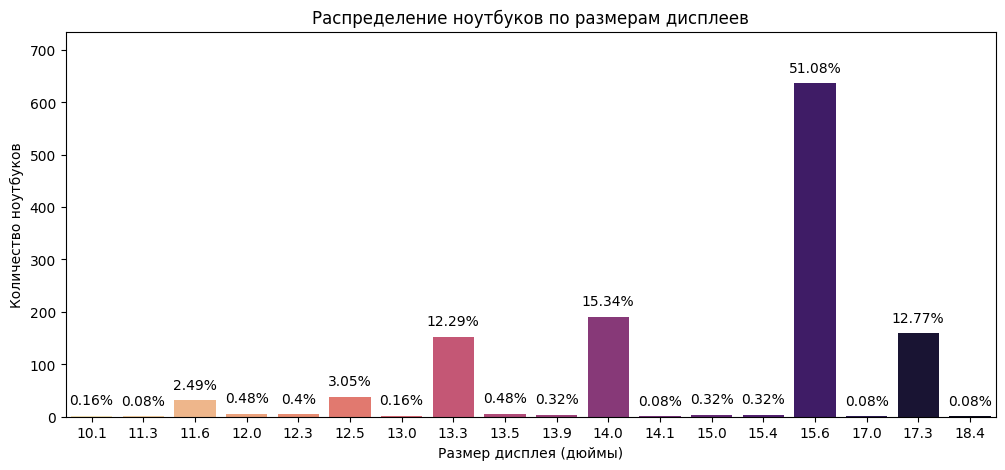

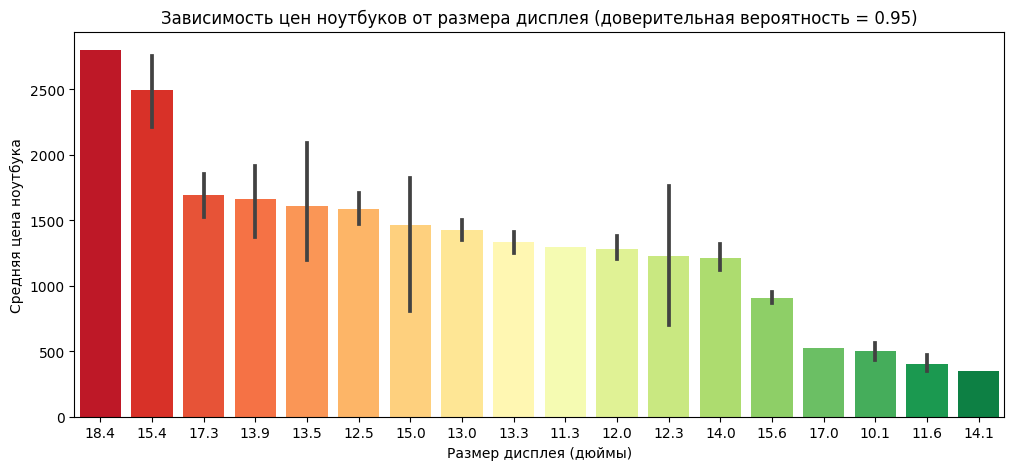

In [56]:
my_countplot(X['Inches'], (12, 5), 'Распределение ноутбуков по размерам дисплеев', 
                                   'Размер дисплея (дюймы)', 'Количество ноутбуков', vert=True)
my_barplot(data, 'Inches', (12, 5), 'размера дисплея', 'Размер дисплея (дюймы)')

Интересная закономерность: несмотря на кажущееся большим разнообразие размеров дисплеев (целых 18 вариантов), у большинства ноутбуков дисплей равен всего одному из 4 вариантов (`15.6`, `14.0`, `17.3`, `13.3`). При этом около половины всех ноутбуков имеет дисплей `15.6` дюймов. Видим также, что почти все ноутбуки с популярными размерами дисплея имеют невысокую среднюю стоимость. Линейная связь между размером дисплея и стоимостью ноутбука не наблюдается.

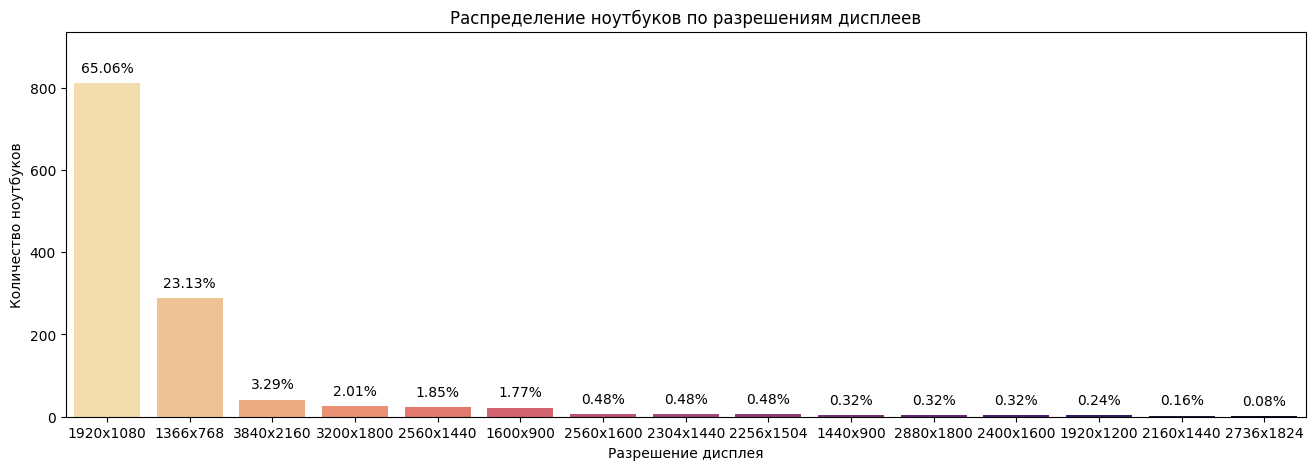

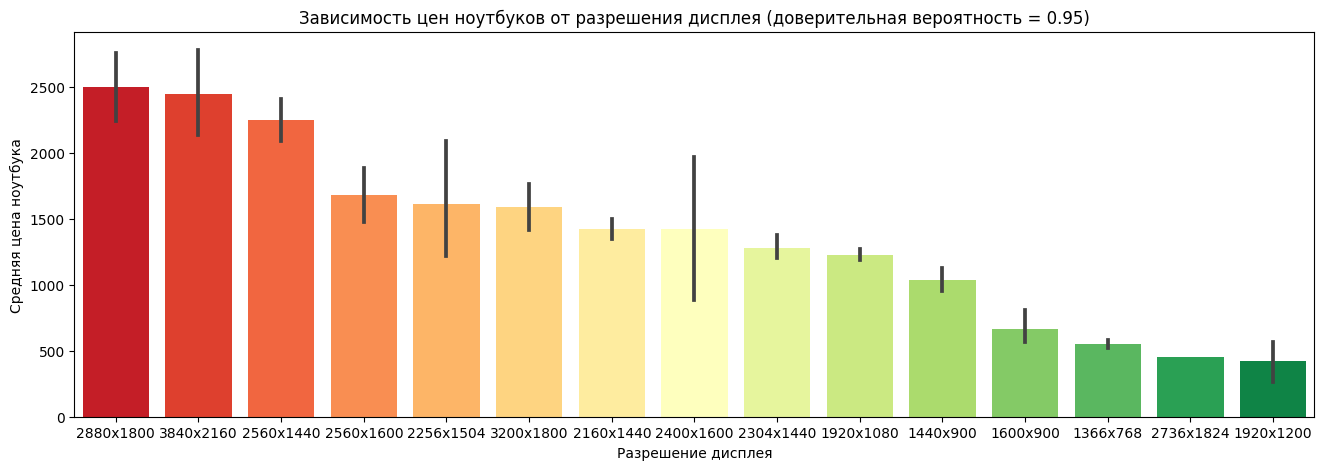

In [57]:
my_countplot(X['ScreenRes'], (16, 5), 'Распределение ноутбуков по разрешениям дисплеев', 
                                   'Разрешение дисплея', 'Количество ноутбуков', vert=True, sort=True)
my_barplot(data, 'ScreenRes', (16, 5), 'разрешения дисплея', 'Разрешение дисплея')

С разрешением дисплеев ситуация аналогичная. Не все разрешения одинаково распространены. Из 15 существующих вариантов, основную долю занимают разрешения `1920x1080` и `1366x768`. При этом несмотря на то, что ноутбуки с разрешением `1920x1080` в среднем дороже ноутбуков с разрешением `1366x768`, они встречаются чаще. Можно заметить нестрогую линейную зависимость между разрешением дисплея и стоимостю ноутбука: большое разрешение чаще приводит к более высокой средней цене ноутбука.

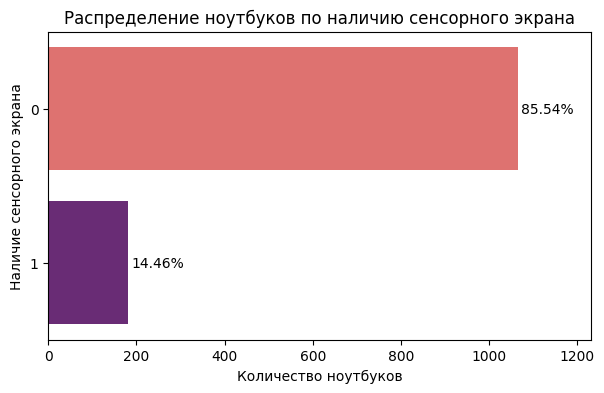

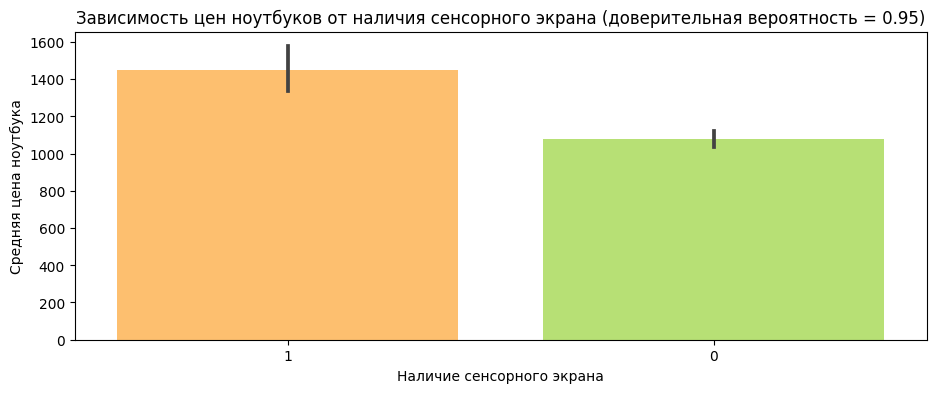

In [58]:
my_countplot(X['Touchscreen'], (7, 4), 'Распределение ноутбуков по наличию сенсорного экрана', 
                                   'Количество ноутбуков', 'Наличие сенсорного экрана')
my_barplot(data, 'Touchscreen', (11, 4), 'наличия сенсорного экрана', 'Наличие сенсорного экрана')

Наличие сенсорного экрана в среднем приводит к повышению цены. При этом сенсорный экран отсутствует в большинстве ноутбуков.

<a id="12_4"></a>
### Оперативная память

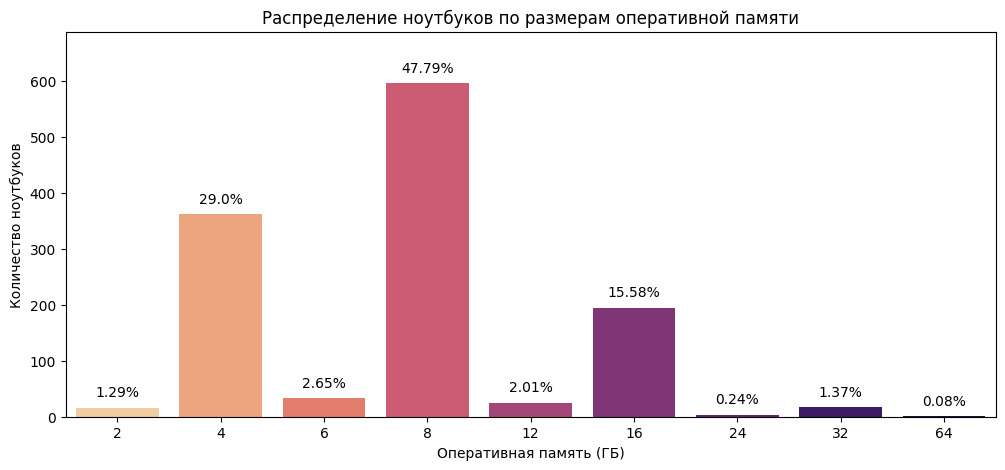

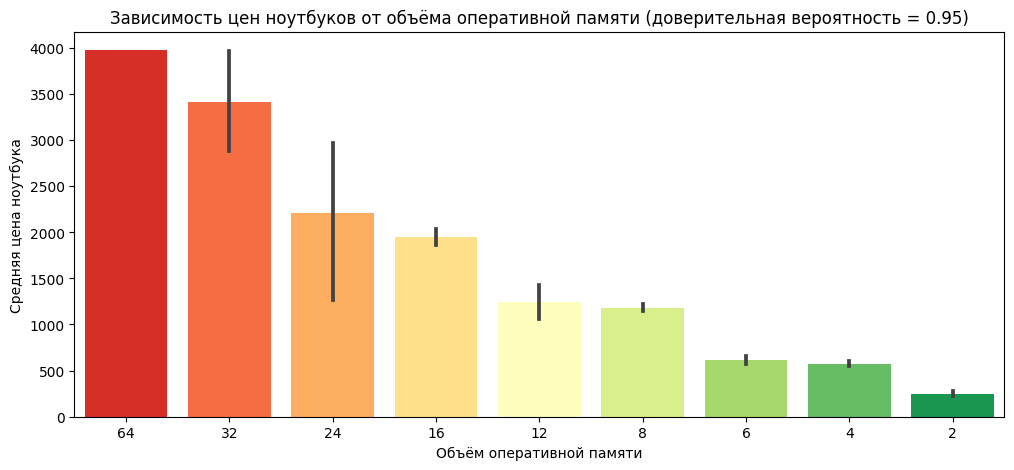

In [59]:
my_countplot(X['Ram_GB'], (12, 5), 'Распределение ноутбуков по размерам оперативной памяти', 
                                    'Оперативная память (ГБ)', 'Количество ноутбуков', vert=True)
my_barplot(data, 'Ram_GB', (12, 5), 'объёма оперативной памяти', 'Объём оперативной памяти')

Из данных графиков видим, что оперативная память выше 16 ГБ практически не встречается, что может быть связано с их высокой стоимостью. Маленькая память 2ГБ также очень редкая несмотря на то, что ноутбуки с такой памятью в среднем крайне дешёвые. 

<u>Второй график приводит к очень важному наблюдению:</u> чем больше оперативной памяти у ноутбука, тем в среднем дороже он стоит. Из общей тенденции вероятно выбивается значение 24 ГБ, что можно заметить по широкому доверительному интервалу средней стоимости. И всё же в отличие от всех предыдущих закономерностей эта является наиболее выраженной. 

<a id="12_5"></a>
### Типы ноутбков и операционные системы

Ноутбуки бывают разных категорий. Тип ноутбука может оказывать влияние на итогоую стоимость, поэтому важно посмотреть, какие типы ноутбуков встречаются часто, а какие очень редко. Также некоторые типы ноутубков могут быть связаны с вариантами возможных операционных систем.

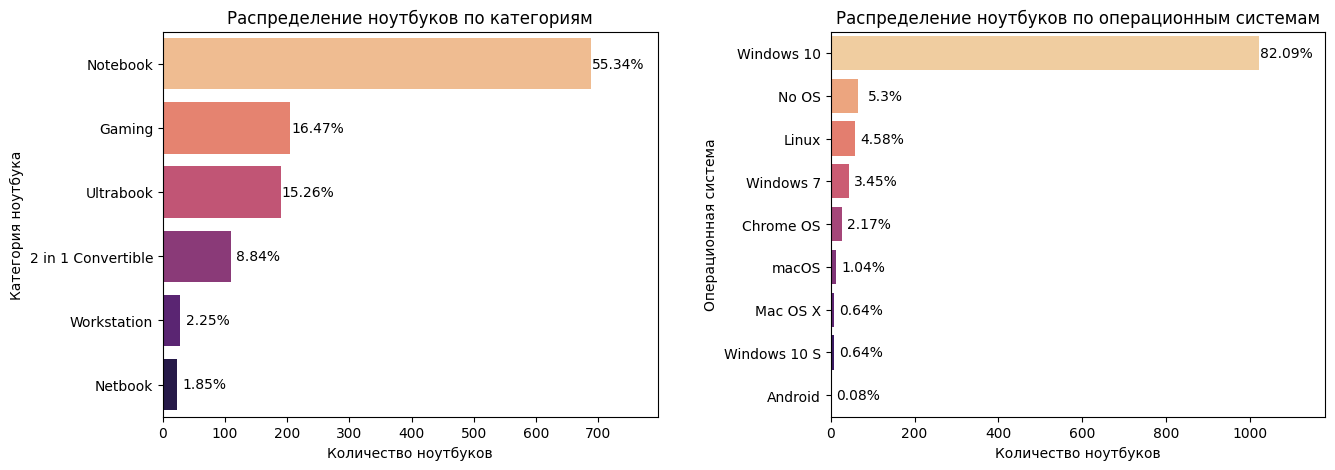

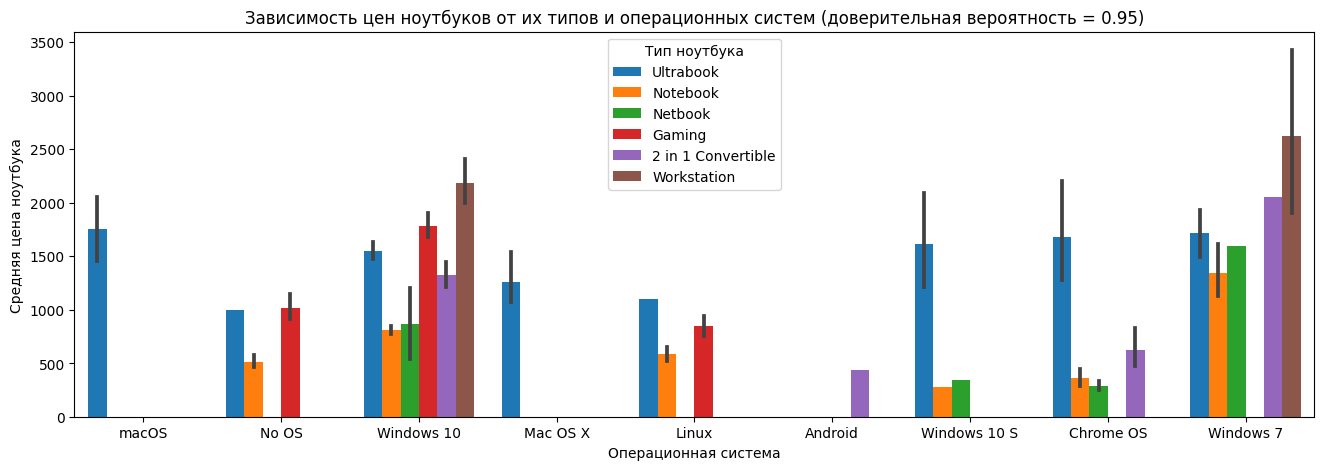

In [60]:
fig = plt.figure(figsize=(15, 5))
axes = fig.subplots(1, 2)
order1 = X['TypeName'].value_counts().index
sns.countplot(y=X['TypeName'], order=order1, palette='magma_r', ax=axes[0])
axes[0].title.set_text('Распределение ноутбуков по категориям')
axes[0].set_xlabel('Количество ноутбуков')
axes[0].set_ylabel('Категория ноутбука')
order2 = X['OpSys'].value_counts().index
show_marks(axes[0], percent=True, vert=False)
sns.countplot(y=X['OpSys'], order=order2, palette='magma_r', ax=axes[1])
axes[1].title.set_text('Распределение ноутбуков по операционным системам')
axes[1].set_xlabel('Количество ноутбуков')
axes[1].set_ylabel('Операционная система')
show_marks(axes[1], percent=True, vert=False)
plt.subplots_adjust(wspace=0.35)
plt.show();

my_barplot(data, 'OpSys', (16, 5), 'их типов и операционных систем', 'Операционная система', 'TypeName', 'Тип ноутбука', 9)

Более половины всех ноутбуков имеют тип `Notebook`. Наименее популярная категория - `Netbook`. Практически весь датасет содержит сведения о ноутбуках с предустановленной операционной системой `Windows 10`. При дальнейшем анализе следует учитывать данный факт, так как все выводы, которые будут сделаны, будут относиться в первую очередь именно к моделям ноутубуков с этой операционной системой. Все остальные операционные системы составляют очень малую долю и так небольшого набора данных, поэтому их отдельный анализ является затруднительным.

<a id="12_6"></a>
### Процессоры

Рассмотрим сначла характеристики центральных процессоров. Построим графики для производителей и моделей CPU.

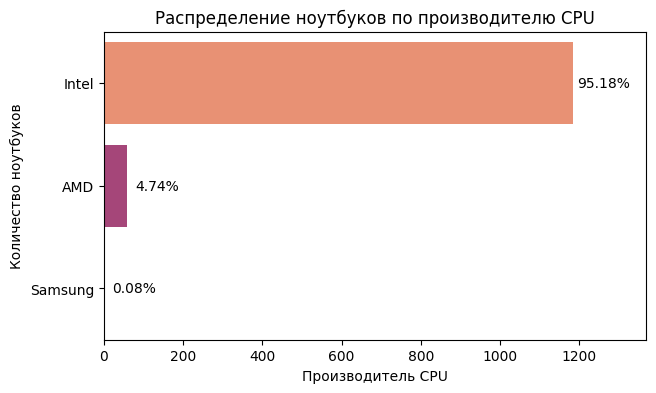

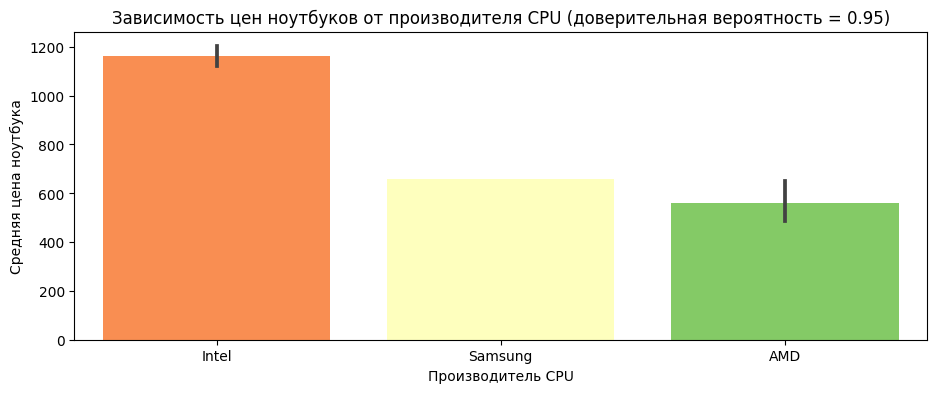

In [61]:
my_countplot(X['Cpu_producer'], (7, 4), 'Распределение ноутбуков по производителю CPU', 
                                    'Производитель CPU', 'Количество ноутбуков')
my_barplot(data, 'Cpu_producer', (11, 4), 'производителя CPU', 'Производитель CPU')

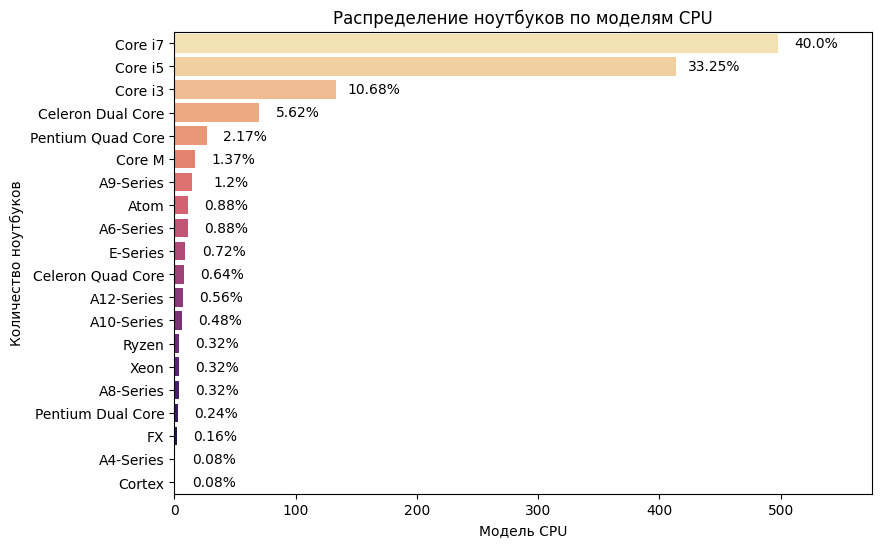

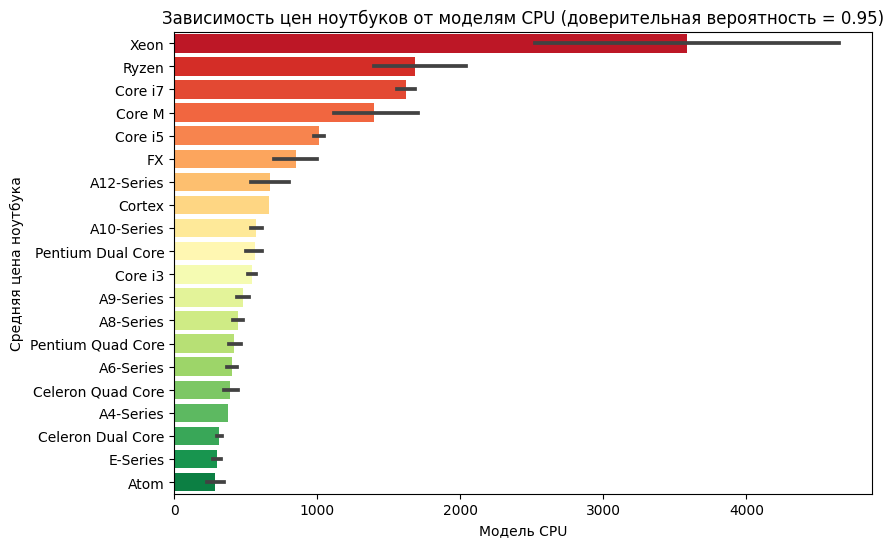

In [62]:
my_countplot(X['Cpu_model'], (9, 6), 'Распределение ноутбуков по моделям CPU', 
                                    'Модель CPU', 'Количество ноутбуков', vert=False, sort=True)
my_barplot(data, 'Cpu_model', (9, 6), 'моделям CPU', 'Модель CPU', vert=False)

Абсолютное большинство ноутбуков имеют процессоры от Intel, однако ноутбуки с AMD процессором в среднем дешевле.

Теперь посмотрим на частоты центральных процессоров.

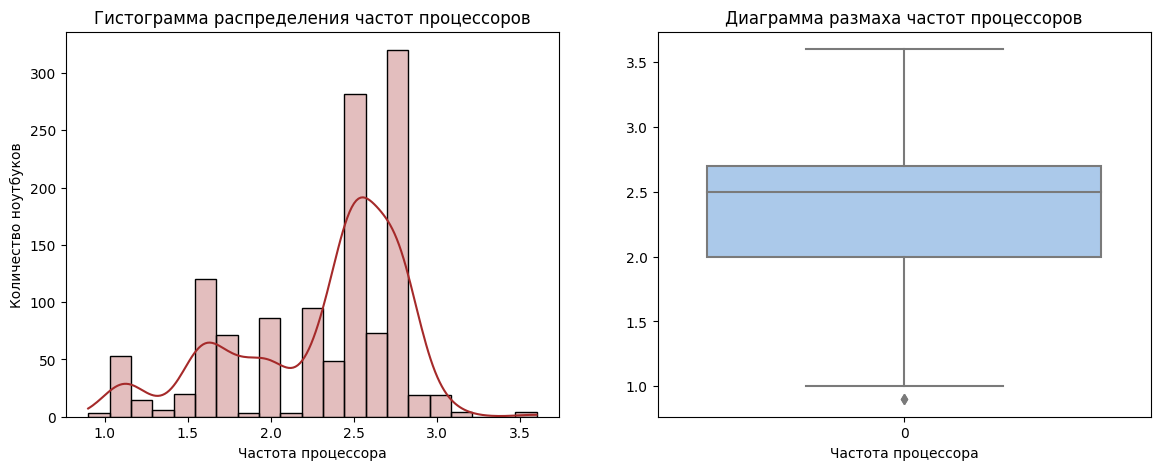

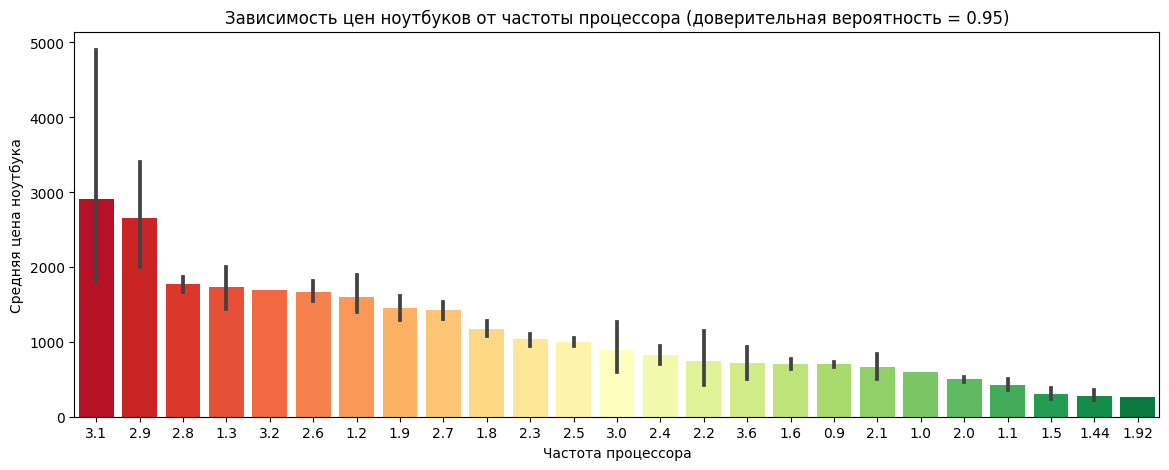

In [63]:
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2)
sns.histplot(X['Cpu_GHz'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения частот процессоров")
axes[0].set_xlabel('Частота процессора')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(X['Cpu_GHz'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха частот процессоров")
axes[1].set_xlabel('Частота процессора')
plt.show();

my_barplot(data, 'Cpu_GHz', (14, 5), 'частоты процессора', 'Частота процессора')

Наблюдаем относительно большое разнообрание частот, однако всё же есть значения, которые встречаются крайне редко. Причём редкими являются не только самые высокие и низкие значения. Также из диаграммы размаха можем сделать вывод, что значительные выбросы отсутствуют. Интересен также факт, что высокая частота процессора не всегда приводит к более высокой средней стоимости ноутбука.

Перейдём к графическим процессорам.

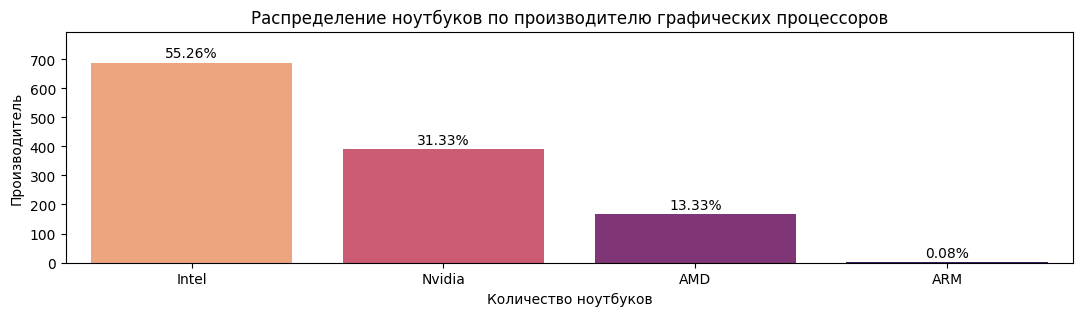

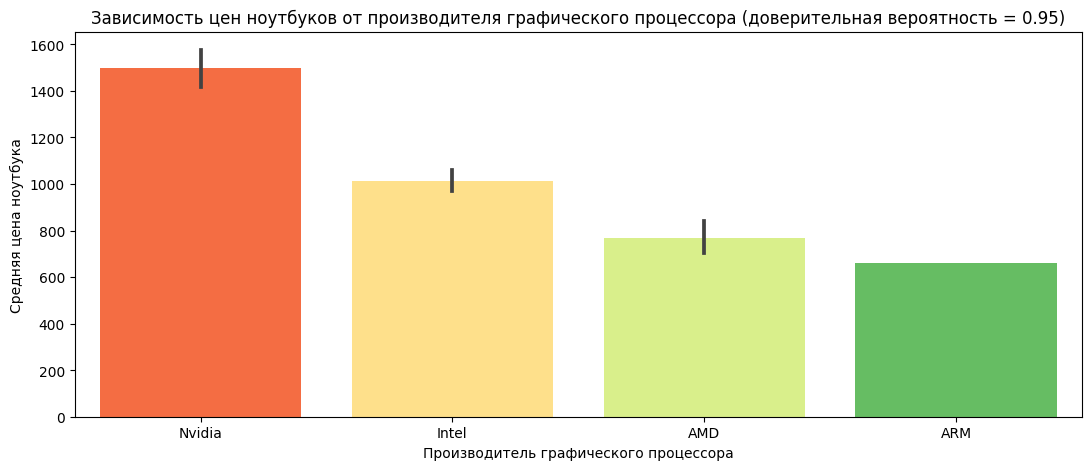

In [64]:
my_countplot(X['Gpu_producer'], (13, 3), 'Распределение ноутбуков по производителю графических процессоров', 
                                    'Количество ноутбуков', 'Производитель', vert=True, sort=True)
my_barplot(data, 'Gpu_producer', (13, 5), 'производителя графического процессора', 'Производитель графического процессора')

Можно заметить, что значение `ARM` практически не встречается. Посмотрим, сколько раз оно встречается в датасете.

In [65]:
print(f"Значение ARM встречается в датасете {X['Gpu_producer'].value_counts().sort_values()['ARM']} раз.")

Значение ARM встречается в датасете 1 раз.


Таким образом, можем отнести данное значение к выбросам, так как на его основе мы не сможем сделать никаких статистически значимых выводов. Средняя стоимость ноутбуков с `ARM`, показанная на диаграмме вычислена на основе всего 1 значения, поэтому нельзя быть уверенными в том, что граифческие процессоры `ARM` являются признаком низкой стоимости ноутбуков. Однако удалять запись о ноутбуке с этим графическим процессором всё же не будем, так как остальные характеристики ноутбука не относятся к выбросам и представляют интерес для анализа.

Рассмотрим самые популярные модели графических процессоров каждого из производителей.

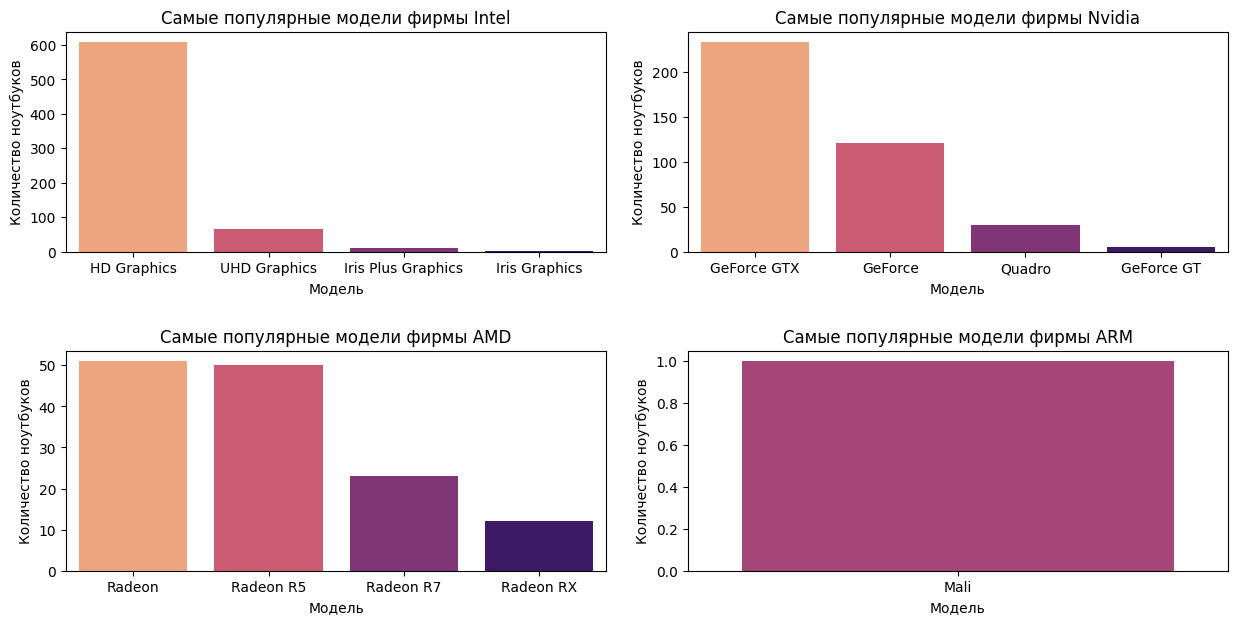

In [66]:
top_companies = X['Gpu_producer'].value_counts().head(4).index.values
grouped_X = X.groupby('Gpu_producer')['Gpu_model'].value_counts()
fig = plt.figure(figsize=(15, 7))
axes = fig.subplots(2, 2)
for i, company in enumerate(top_companies):
    ax=axes[i // 2][i % 2]
    top_products = grouped_X[company].head(4)
    sns.barplot(x=top_products.index, y=top_products.values, ax=ax, palette='magma_r')
    ax.title.set_text(f'Самые популярные модели фирмы {company}')
    ax.set_xlabel('Модель')
    ax.set_ylabel('Количество ноутбуков')
plt.subplots_adjust(wspace=0.15, hspace=0.45)
plt.show()

Для моделей `ARM` получили предсказуемый результат. Для остальных производителей видим наличие явно лидирующей модели даже среди 4 самых популярных моделей.

<a id="12_7"></a>
### Жёсткие диски

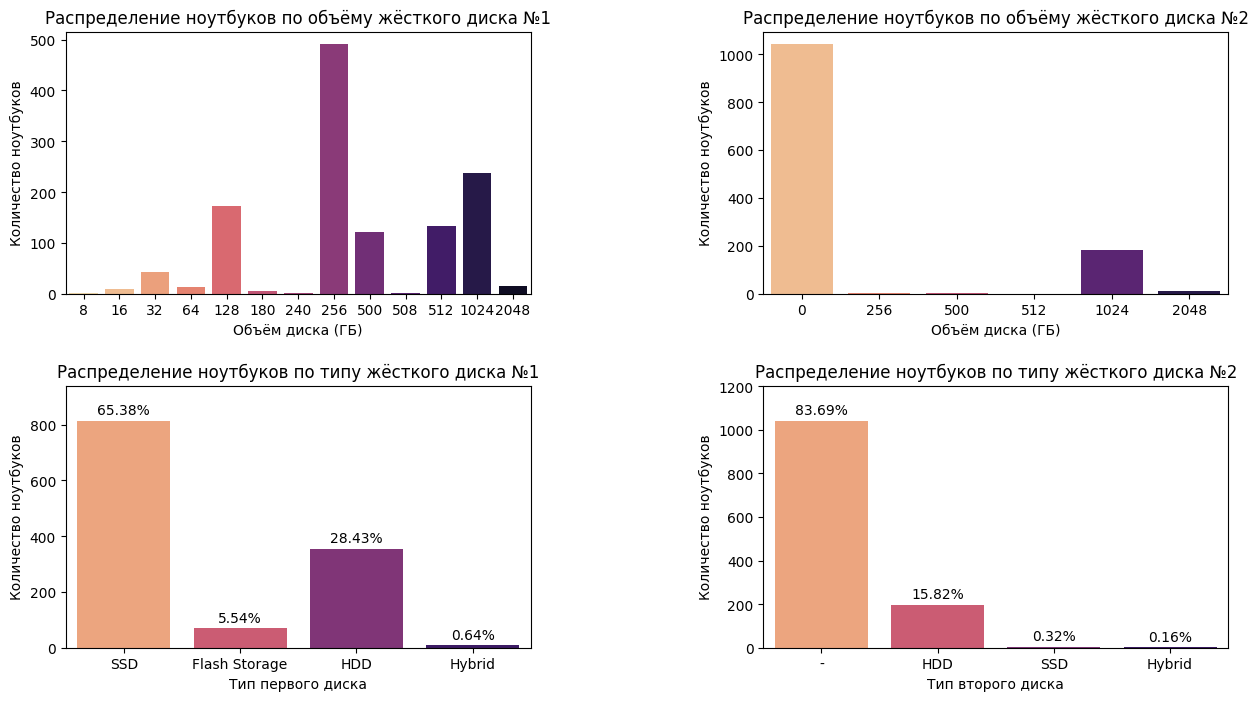

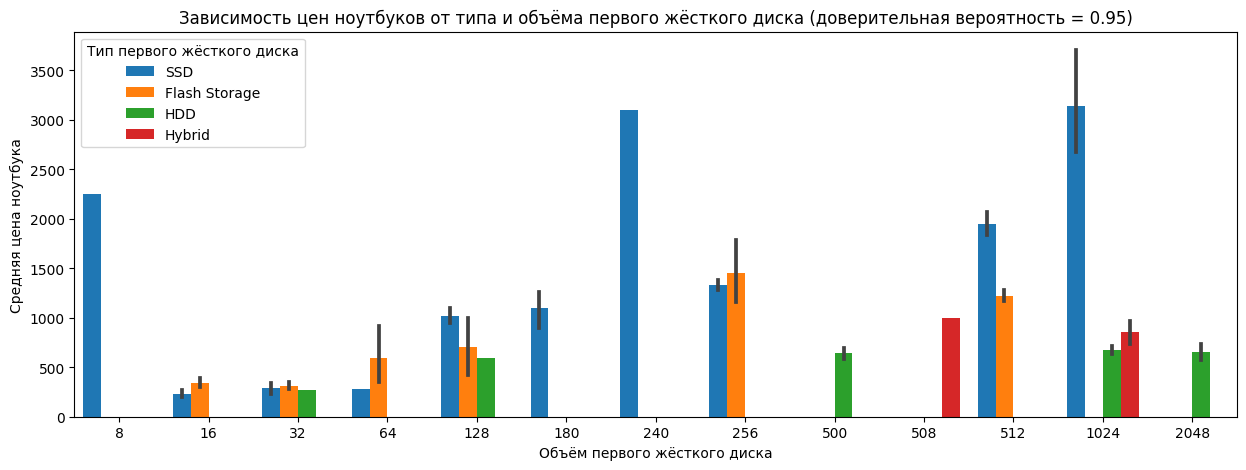

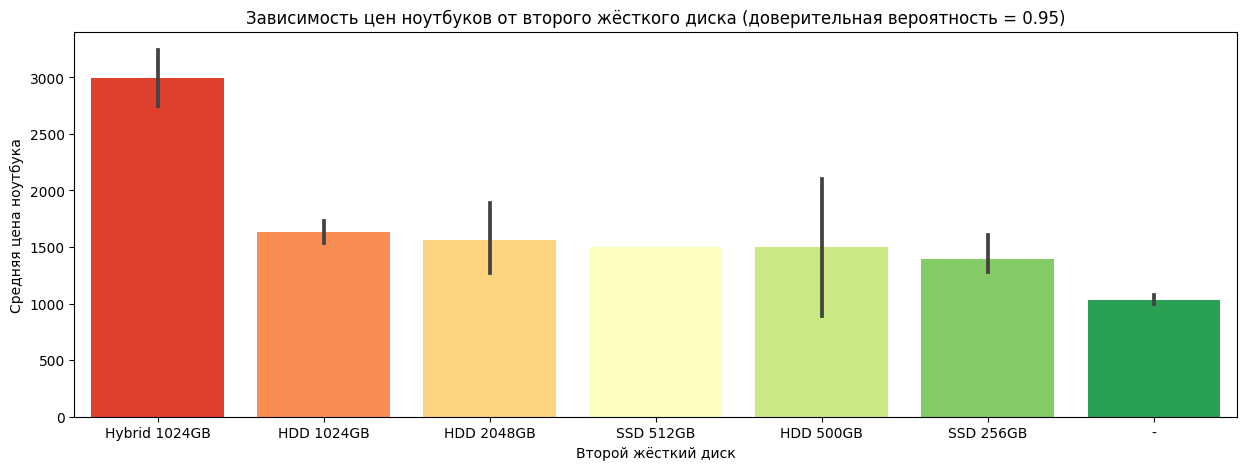

In [67]:
fig = plt.figure(figsize=(15, 8))
ax1, ax2 = fig.subplots(2, 2)
sns.countplot(x = X['Memory1_GB'], ax=ax1[0], palette='magma_r')
ax1[0].title.set_text('Распределение ноутбуков по объёму жёсткого диска №1')
ax1[0].set_xlabel('Объём диска (ГБ)')
ax1[0].set_ylabel('Количество ноутбуков')
sns.countplot(x = X['Memory2_GB'], ax=ax1[1], palette='magma_r')
ax1[1].title.set_text('Распределение ноутбуков по объёму жёсткого диска №2')
ax1[1].set_xlabel('Объём диска (ГБ)')
ax1[1].set_ylabel('Количество ноутбуков')
my_plot = sns.countplot(x = X['Memory1_type'], ax=ax2[0], palette='magma_r')
ax2[0].title.set_text('Распределение ноутбуков по типу жёсткого диска №1')
ax2[0].set_xlabel('Тип первого диска')
ax2[0].set_ylabel('Количество ноутбуков')
show_marks(ax2[0], percent=True, vert=True)
sns.countplot(x = X['Memory2_type'], ax=ax2[1], palette='magma_r')
ax2[1].title.set_text('Распределение ноутбуков по типу жёсткого диска №2')
ax2[1].set_xlabel('Тип второго диска')
ax2[1].set_ylabel('Количество ноутбуков')
show_marks(ax2[1], percent=True, vert=True)
plt.subplots_adjust(wspace=0.5, hspace=0.35)
plt.show();

my_barplot(data, 'Memory1_GB', (15, 5), 'типа и объёма первого жёсткого диска', 'Объём первого жёсткого диска', 
           'Memory1_type', 'Тип первого жёсткого диска')
my_barplot(data, 'Memory2', (15, 5), 'второго жёсткого диска', 'Второй жёсткий диск')

В отличие от многих других параметров, где самые высокие значения встречались крайне редко, здесь видим, что жёсткие диски с больших объёмом 1 ТБ находятся на 2 месте по популярности. Ноутбуки с диском SSD оказываются как правило дороже ноутбуков с диском HDD. При этом также видим явную закономерность: в качестве первого жёсткого диска чаще всего выступает SSD, а вторым диском (при его наличии) в абсолютном большинстве случае всегда является HDD и его размер как правило не меньше 1 ТБ. Однако сам второй жёсткий диск встречается довольно редко.

Анализ второго жёсткого диска также показал, что многие типы и размеры дисков не оказывают серьёзного влияни на среднюю стоимость ноутбуков. Но важно другое: мы видим ярко выраженую зависимость стоимости ноутбука от самого факта наличия или отсутствия второго жёсткого диска. Поэтому делаем вывод о том, что второй жёсткий диск является довольно важным признаком для оценивания стоимости ноутбуков.

<a id="13"></a>
# 4) Информация о корреляции признаков

Выше были рассмотрены зависимости целевой переменной $y$ от признаков $X$. Посмотрим теперь, как признаки $X$ связаны между собой. Вычислим для этого матрицу корреляций для всех числовых признаков $X$. Полученные коэффициенты взаимной корреляции будут означать, насколько сильно два параметра статистически взаимосвязаны. Это поможет выявить возможные зависимости в данных. Стремление коэффициента корреляции к нулю будет означать, что параметры не связаны между собой. Значения, близкие к 1, будут означать наличие сильной связи между параметрами. Коэффициент, равный 1, означает линейную зависимость одного параметра от другого. Отрицательные же значения коэффициентов являются признаком обратной зависимости, то есть с увеличением значений первого параметра значения второго уменьшаются.

In [68]:
X.corr()

,laptop_ID,Inches,Ram_GB,Weight_kg,Touchscreen,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
laptop_ID,1.000000,-0.075486,-0.003547,-0.001119,0.050938,-0.020879,-0.033380,0.118242,-0.013298,-0.003989
Inches,-0.075486,1.000000,0.240363,0.824385,-0.352981,-0.067584,-0.091071,0.310588,0.264476,0.386460
Ram_GB,-0.003547,0.240363,1.000000,0.391303,0.113707,0.421205,0.412779,0.374050,0.013950,0.391162
Weight_kg,-0.001119,0.824385,0.391303,1.000000,-0.285371,-0.025463,-0.046308,0.323783,0.173368,0.482803
Touchscreen,0.050938,-0.352981,0.113707,-0.285371,1.000000,0.338399,0.344577,-0.094654,-0.022528,-0.131867
ScreenWidth,-0.020879,-0.067584,0.421205,-0.025463,0.338399,1.000000,0.994055,0.184349,-0.075368,0.154483
ScreenHeight,-0.033380,-0.091071,0.412779,-0.046308,0.344577,0.994055,1.000000,0.170672,-0.082025,0.143355
Cpu_GHz,0.118242,0.310588,0.374050,0.323783,-0.094654,0.184349,0.170672,1.000000,0.054847,0.242892
Memory1_GB,-0.013298,0.264476,0.013950,0.173368,-0.022528,-0.075368,-0.082025,0.054847,1.000000,-0.245161
Memory2_GB,-0.003989,0.386460,0.391162,0.482803,-0.131867,0.154483,0.143355,0.242892,-0.245161,1.000000


Для удобства анализа полученной таблицы построим по ней тепловую карту.

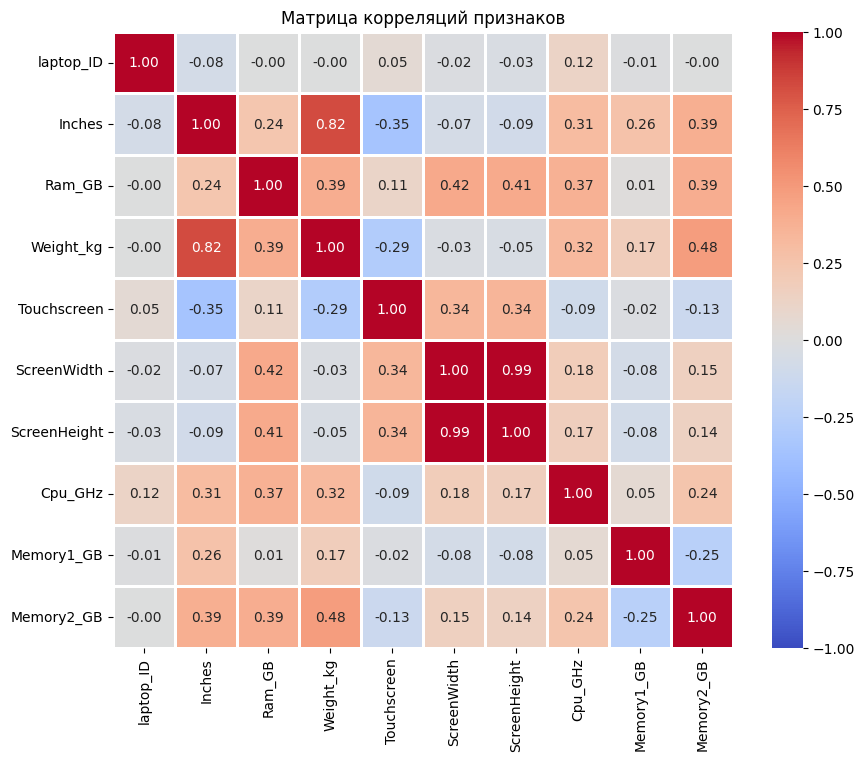

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Матрица корреляций признаков');

Выводы:
- размер дисплея и масса ноутбука имеют ярко выраженную статистическую зависимость;
- разрешение экрана по вертикали практически линейно зависит от разрешения экрана по горизонтали, что говорит об избыточности данных при хранении обоих параметров;
- существует довольно высокая корреляция между массой ноутбука и объёмом второго жёсткого диска (можно объяснить тем, что почти все значения объёма жёсткого дика равны либо 0 либо 1024 ГБ, поэтому была найдена зависимость массы не от объёма диска, а по сути от факта отсутствия либо наличия диска);
- есть некоторая прямая связь между объёмом оперативной памяти и разрешением экрана;
- объёмы оперативной памяти и первого жёсткого диска не коррелируют, то есть между ними отсутствует какая-либо линейная связь;
- частота процессора коррелирует с объёмом оперативной памяти.

В целом видим, что большая часть коэффициентов положительна. Это логично, так как более высокие значения одной из характеристик чаще указывают на то, что остальные характеристи тоже будут не слишком низкими.

Теперь найдём коэффициенты корреляции между признаками $X$ и целевой переменной $y$, чтобы определить влияние признаков на стоимость ноутбуков и сравнить результаты с закономерностями, выявленными ранее при визуализации распределений признаков $X$ и их связей с целевой переменной $y$.

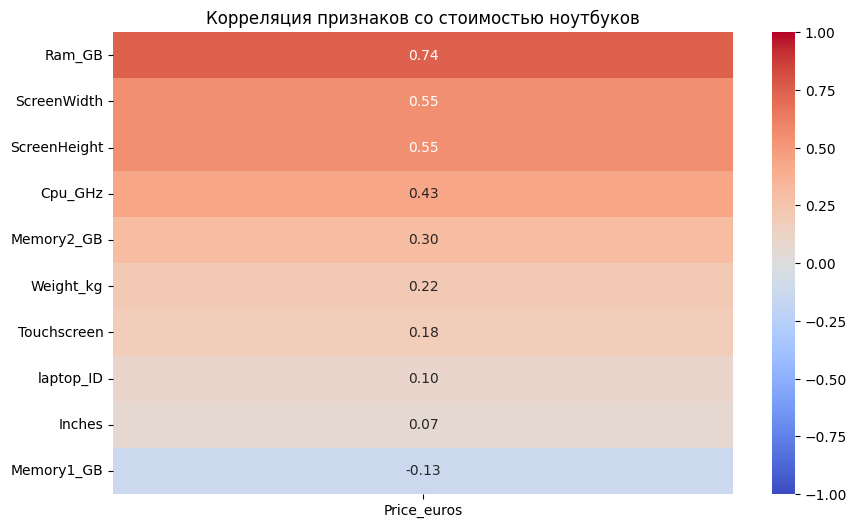

In [70]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(data.corr()[target_name].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков со стоимостью ноутбуков');

Полученный столбец характеризует значимость признаков. То есть наибольший вклад в значение стоимости ноутбука вносит размер оперативной памяти, что и было обнаружено ранее, а наименьший вклад у размера экрана. Практически все признаки имеют положительную корреляцию со стоимостью ноутбука, что говорит о наличии прямой линейной зависимости. Единственный отрицательный коэффициент корреляции у объёма первого жёсткого диска. Это можно объяснить тем, что диски HDD, которые в среднем дешевле SSD, имеют в среднем больший объём памяти и поэтому наблюдается слабая обратная зависимость: чем больше объём диска, тем дешевле ноутбук. Однако коэффицент корреляции слишком маленький, чтобы делать из этого серьёзные выводы. Так, например, между стоимостью ноутбука и его уникальным идентификатором тоже существует слабая корреляция, хотя на самом деле причинно-следственная связь между этими парамерами явно отсутствует.

# Сохранение обработанного датасета

Удалим столбцы `Memory2` и `ScreenRes`, так как они дублируют информацию и были нужны для удобства построения диаграмм.

In [71]:
data.drop(['Memory2', 'ScreenRes'], axis=1, inplace=True)

In [72]:
data.to_csv('laptop_price_preprocessed.csv', index=False)

# 5) Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров моделей машинного обучения.

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from warnings import simplefilter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import set_config

simplefilter('ignore')

## Загрузка предобработанного датасета

In [74]:
data = pd.read_csv('laptop_price_preprocessed.csv')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Touchscreen,ScreenWidth,ScreenHeight,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2560,1600,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640,128,SSD,0,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,0,1440,900,Intel,-,Core i5,1.8,Intel,HD Graphics,6000,128,Flash Storage,0,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,0,1920,1080,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620,256,SSD,0,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2880,1800,Intel,-,Core i7,2.7,AMD,Radeon Pro,455,512,SSD,0,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,0,2560,1600,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650,256,SSD,0,-


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   laptop_ID     1245 non-null   int64  
 1   Company       1245 non-null   object 
 2   Product       1245 non-null   object 
 3   TypeName      1245 non-null   object 
 4   Inches        1245 non-null   float64
 5   Ram_GB        1245 non-null   int64  
 6   OpSys         1245 non-null   object 
 7   Weight_kg     1245 non-null   float64
 8   Price_euros   1245 non-null   float64
 9   Touchscreen   1245 non-null   int64  
 10  ScreenWidth   1245 non-null   int64  
 11  ScreenHeight  1245 non-null   int64  
 12  Cpu_producer  1245 non-null   object 
 13  Cpu_series    1245 non-null   object 
 14  Cpu_model     1245 non-null   object 
 15  Cpu_GHz       1245 non-null   float64
 16  Gpu_producer  1245 non-null   object 
 17  Gpu_model     1245 non-null   object 
 18  Gpu_series    1245 non-null 

In [76]:
category_cols = data.columns[data.dtypes == object]
print('Количество уникальных значений категориальных признаков\n')
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений категориальных признаков

Company: 19
Product: 618
TypeName: 6
OpSys: 9
Cpu_producer: 3
Cpu_series: 88
Cpu_model: 20
Gpu_producer: 4
Gpu_model: 26
Gpu_series: 76
Memory1_type: 4
Memory2_type: 4


In [77]:
#OneHotEncoder(handle_unknown='ignore', sparse=False).fit_transform(data[data.columns[data.dtypes == object].drop('Product')]).shape

## Разделение выборки на обучающую и тестовую

In [78]:
y = data['Price_euros']
X = data.drop(['laptop_ID', 'ScreenHeight', 'Price_euros', 'Product'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [79]:
X.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Touchscreen,ScreenWidth,Cpu_producer,Cpu_series,Cpu_model,Cpu_GHz,Gpu_producer,Gpu_model,Gpu_series,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type
0,Apple,Ultrabook,13.3,8,macOS,1.37,0,2560,Intel,-,Core i5,2.3,Intel,Iris Plus Graphics,640,128,SSD,0,-
1,Apple,Ultrabook,13.3,8,macOS,1.34,0,1440,Intel,-,Core i5,1.8,Intel,HD Graphics,6000,128,Flash Storage,0,-
2,HP,Notebook,15.6,8,No OS,1.86,0,1920,Intel,7200U,Core i5,2.5,Intel,HD Graphics,620,256,SSD,0,-
3,Apple,Ultrabook,15.4,16,macOS,1.83,0,2880,Intel,-,Core i7,2.7,AMD,Radeon Pro,455,512,SSD,0,-
4,Apple,Ultrabook,13.3,8,macOS,1.37,0,2560,Intel,-,Core i5,3.1,Intel,Iris Plus Graphics,650,256,SSD,0,-


In [80]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

## Пайплайн

In [81]:
numeric_transformer = Pipeline([('scaler', MinMaxScaler())])
categorical_transformer = Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = data.select_dtypes(['int64', 'float64']).columns.drop(['laptop_ID', 'ScreenHeight', 'Price_euros'])
categorical_features = data.columns[data.dtypes == object].drop('Product')

preprocessor = ColumnTransformer([('numeric', numeric_transformer, numeric_features),
                                  ('categorical', categorical_transformer, categorical_features)])

regressors = {
    KNeighborsRegressor(): {'regressor__n_neighbors': [3, 7, 10, 15], 
                            'regressor__p': [1, 2], 
                            'regressor__weights': ['uniform', 'distance']},
              
    LinearRegression(): {'regressor__fit_intercept': [True, False]},
              
    SVR(): {'regressor__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'regressor__C': [0.5, 1, 2]},
              
    DecisionTreeRegressor(random_state=3): {'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                            'regressor__splitter': ['best', 'random'],
                                            'regressor__max_features': [None, 'sqrt', 'log2'],
                                            'regressor__max_depth': [None, 5, 10]},
              
    RandomForestRegressor(random_state=3, n_jobs=-1): {'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},

    GradientBoostingRegressor(random_state=3): {'regressor__loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
                                                         'regressor__criterion': ['squared_error', 'friedman_mse']}}

pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', KNeighborsRegressor())])

In [82]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Inches', 'Ram_GB', 'Weight_kg', 'Touchscreen', 'ScreenWidth',
       'Cpu_GHz', 'Memory1_GB', 'Memory2_GB'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Company', 'TypeName', 'OpSys', 'Cpu_producer', 'Cpu_series',
       'Cpu_model', 'Gpu_producer', 'Gpu_model', 'Gpu_series', 'Memory1_type',
       'Memory2_type'],
      dtype='object'))])),
                ('regressor', KNeighborsRegressor())])

In [83]:
def print_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R^2: {r2}")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    return r2, mse, mae
    
def print_cv_result(cv_model, x_test, y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(y_test, cv_model.predict(x_test))
    print()

In [84]:
results = []
metrics = {'r2': 'R^2', 'neg_mean_squared_error': 'MSE', 'neg_mean_absolute_error': 'MAE'}
print('_______________________\n')
for regressor, grid_params in regressors.items():
    pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', regressor)])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    print(f'Basic: {regressor}\n')
    r2, mse, mae = print_metrics(y_test, y_pred)    
    results.append([regressor, 'basic', r2, mse, mae])
    
    for metric, metric_for_print in metrics.items():
        print('-----------------------')
        CV = GridSearchCV(pipeline, grid_params, cv=5, verbose=0, scoring=metric, n_jobs=-1)
        CV.fit(x_train, y_train)
        y_pred = CV.predict(x_test)

        print(f'\n{metric_for_print} оптимизация: {CV.best_estimator_.steps[-1][1]}\n')
        r2, mse, mae = print_metrics(y_test, y_pred)    
        results.append([regressor, metric_for_print, r2, mse, mae])
    print('_______________________\n')

_______________________

Basic: KNeighborsRegressor()

R^2: 0.7556894476331
MSE: 115626.33645726202
MAE: 225.5414117647059
-----------------------

R^2 оптимизация: KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

R^2: 0.7872483925655474
MSE: 100690.24323638748
MAE: 221.5832487515912
-----------------------

MSE оптимизация: KNeighborsRegressor(n_neighbors=3, p=1, weights='distance')

R^2: 0.7872483925655474
MSE: 100690.24323638748
MAE: 221.5832487515912
-----------------------

MAE оптимизация: KNeighborsRegressor(n_neighbors=10, p=1, weights='distance')

R^2: 0.8114559750224298
MSE: 89233.37390815282
MAE: 205.13411512582596
_______________________

Basic: LinearRegression()

R^2: 0.7005272554399449
MSE: 141733.28162378626
MAE: 240.47915161023025
-----------------------

R^2 оптимизация: LinearRegression(fit_intercept=False)

R^2: 0.7019850165771349
MSE: 141043.35817148312
MAE: 239.39673096085798
-----------------------

MSE оптимизация: LinearRegression(fit_intercept=Fals

## Визуализация результатов

In [85]:
results_df = pd.DataFrame(results, columns=['model', 'optimized_metric', 'R2', 'MSE', 'MAE'])
model_str = (results_df['model'].apply(lambda x: str(x) + '_') + results_df['optimized_metric'])
results_df['model_str'] = model_str
results_df.head()

,model,optimized_metric,R2,MSE,MAE,model_str
0,KNeighborsRegressor(),basic,0.755689,115626.336457,225.541412,KNeighborsRegressor()_basic
1,KNeighborsRegressor(),R^2,0.787248,100690.243236,221.583249,KNeighborsRegressor()_R^2
2,KNeighborsRegressor(),MSE,0.787248,100690.243236,221.583249,KNeighborsRegressor()_MSE
3,KNeighborsRegressor(),MAE,0.811456,89233.373908,205.134115,KNeighborsRegressor()_MAE
4,LinearRegression(),basic,0.700527,141733.281624,240.479152,LinearRegression()_basic


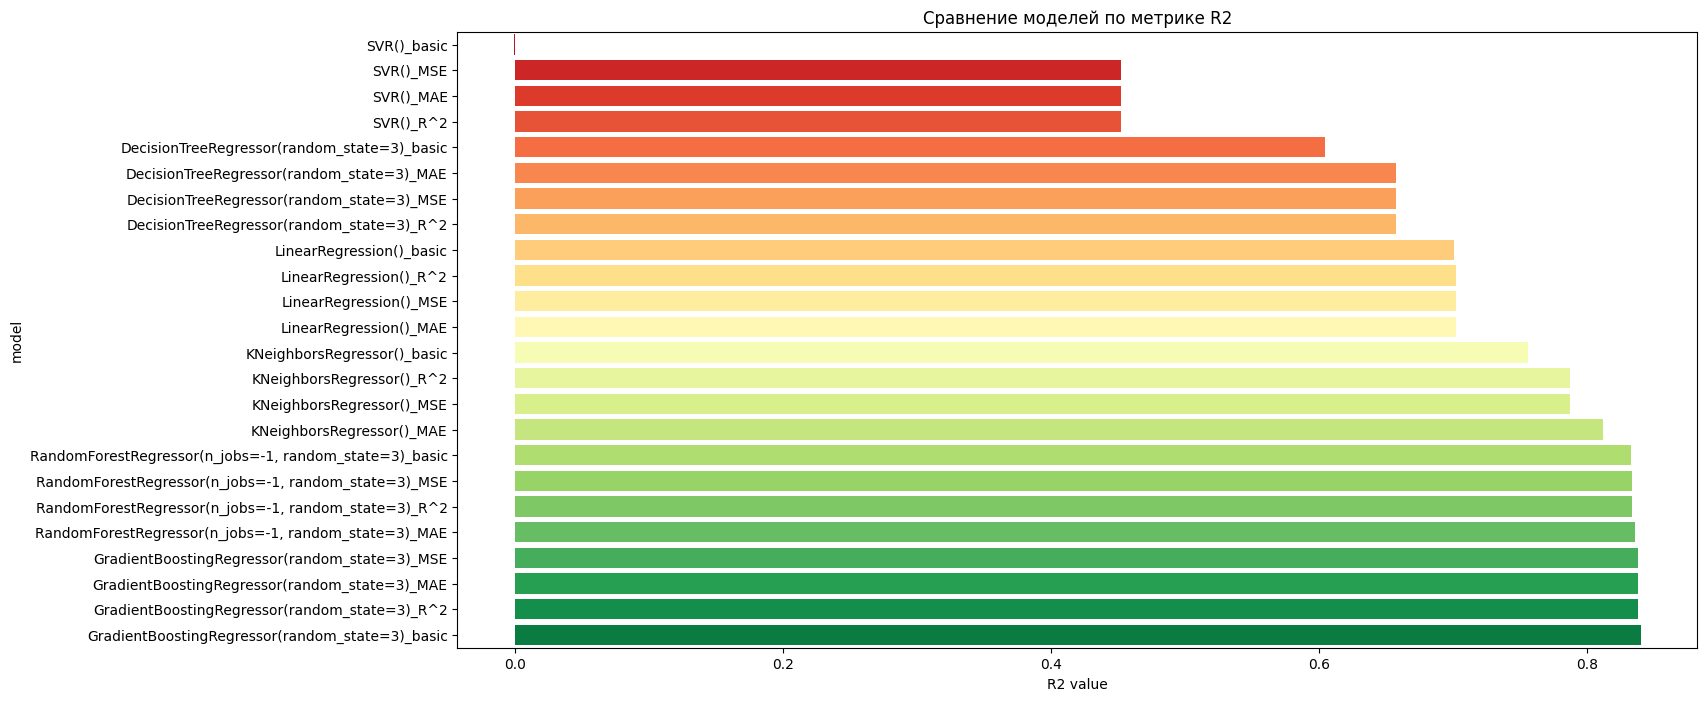

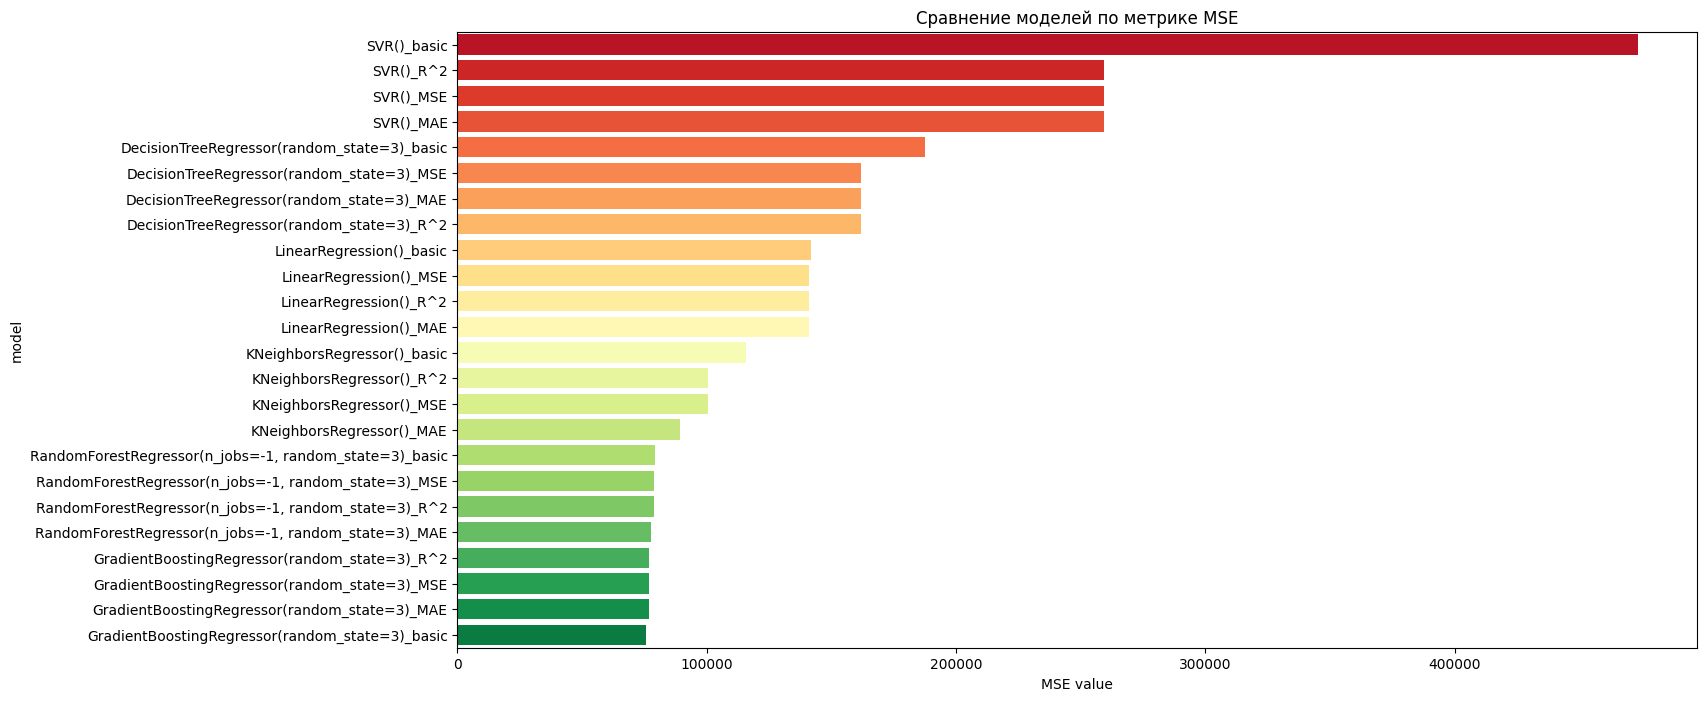

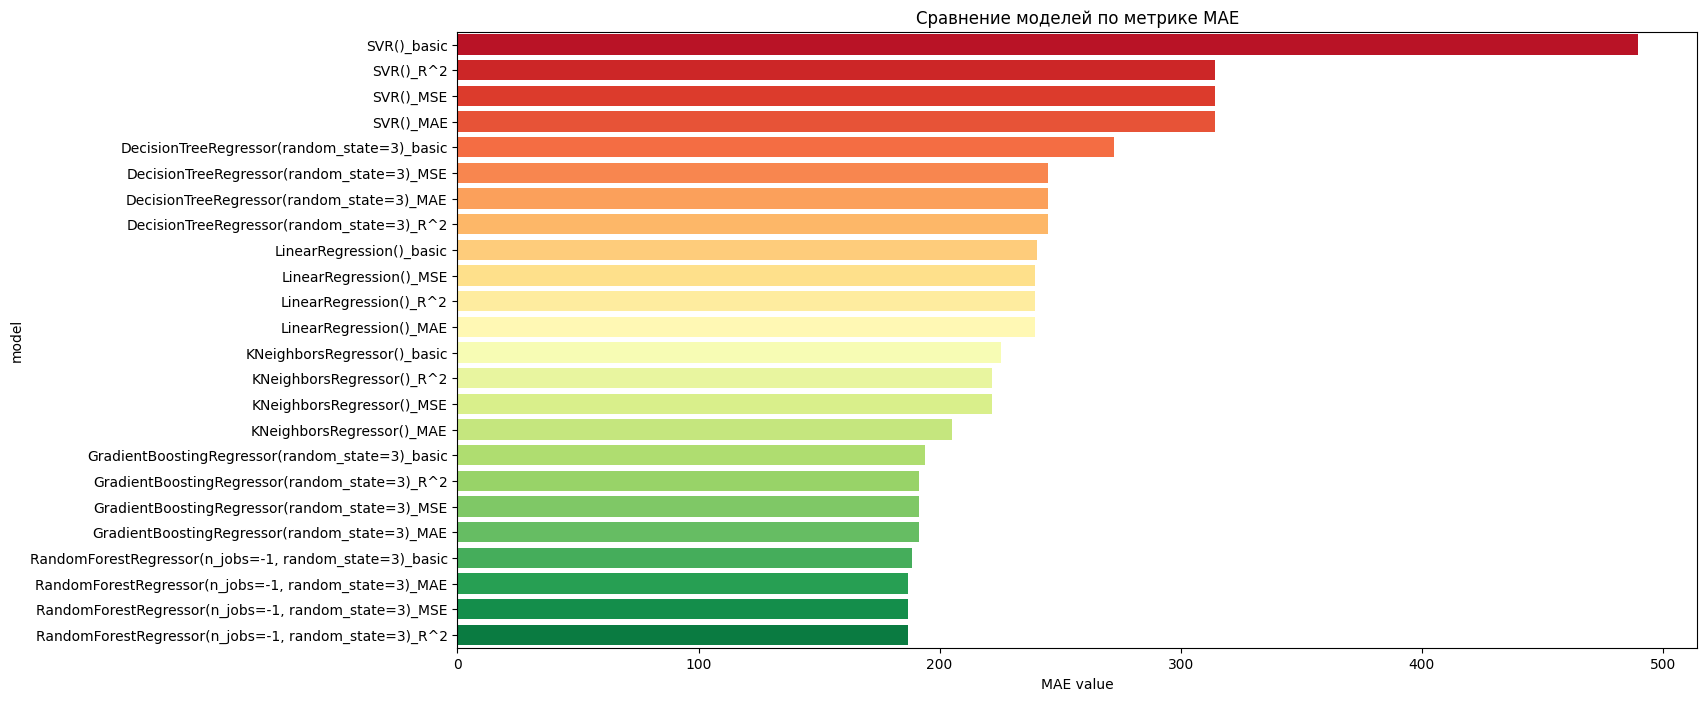

In [86]:
for metric in ['R2', 'MSE', 'MAE']:
    plt.figure(figsize=(16, 8))
    order = results_df.groupby('model_str')[metric].mean().sort_values(ascending=(metric == 'R2')).index
    sns.barplot(data=results_df, y='model_str', x=metric, order=order, palette='RdYlGn', saturation=1)
    plt.title(f"Сравнение моделей по метрике {metric}")
    plt.xlabel(f'{metric} value')
    plt.ylabel('model')
    plt.show()

## Визуализация результатов оптимальной модели

In [91]:
best_model = GradientBoostingRegressor(random_state=3)

In [92]:
pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', best_model)])
pipeline.fit(x_train, y_train)
y_pred_best = pipeline.predict(x_test)

In [93]:
res = pd.DataFrame({'y_test': y_test, 'y_pred_best': y_pred_best}).sort_values(by='y_test')
res.head()

,y_test,y_pred_best
1186,174.0,425.565447
67,229.0,533.022037
472,248.9,346.542702
125,259.0,299.741191
190,260.0,383.312889


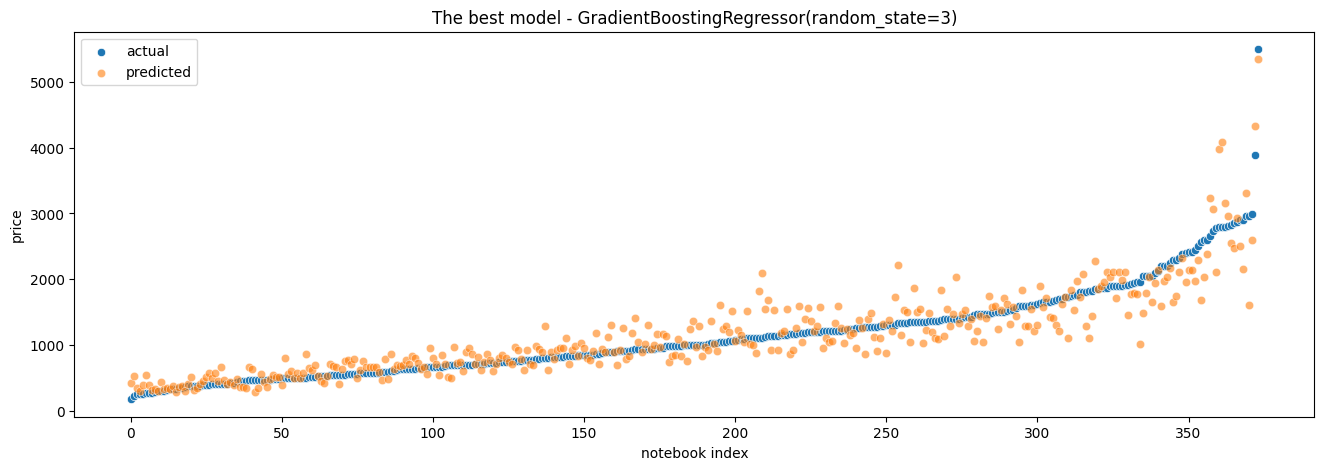

In [94]:
plt.figure(figsize=(16, 5))
sns.scatterplot(x=range(res.shape[0]), y=res['y_test'], label='actual')
sns.scatterplot(x=range(res.shape[0]), y=res['y_pred_best'], label='predicted', alpha=0.6)
plt.ylabel('price')
plt.xlabel('notebook index')
plt.title(f'The best model - {best_model}')
#plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()